In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=30
from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Disply all the cell output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('SEC/CCP.BK.csv', index_col=0, parse_dates=True)
df.head()

Open     High      Low    Close  Adj Close   Volume  Holiday
Date                                                                       
2014-01-02  0.99423  0.99423  0.86832  0.88569   0.746549  5190249        0
2014-01-03  0.87266  0.87266  0.82490  0.84661   0.713609  2730328        0
2014-01-06  0.84661  0.84661  0.75978  0.80754   0.680676  5514553        0
2014-01-07  0.81622  0.86832  0.79017  0.85095   0.717267  4590470        0
2014-01-08  0.85095  0.85095  0.81188  0.83793   0.706292  2015385        0

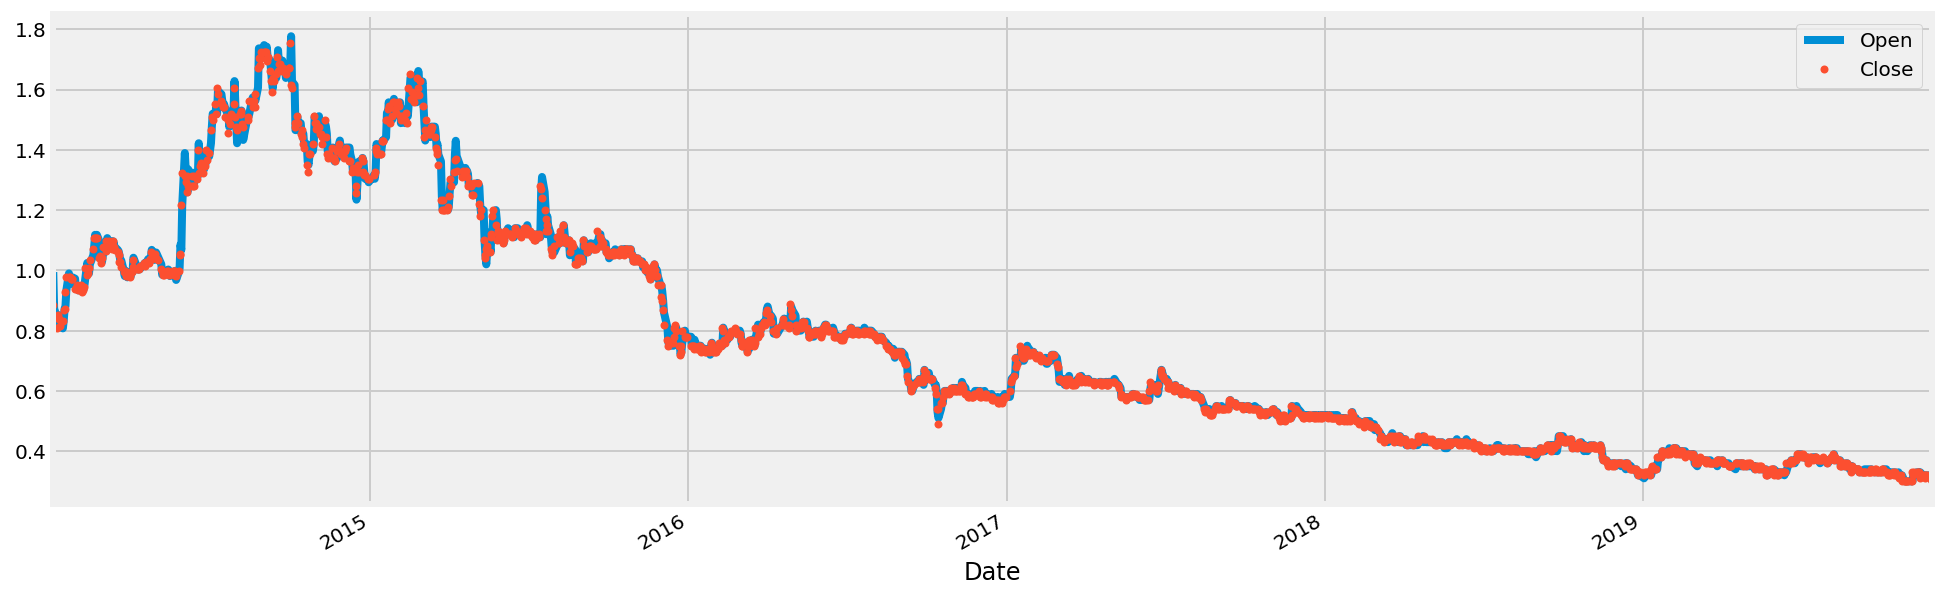

In [3]:
#กราฟ ราคา open close
%config InlineBackend.figure_format = 'retina'
df[['Open','Close']].plot(figsize=(15, 5),style=['-','.'])
plt.savefig('CCP/CCP1.jpg', dpi=300, bbox_inches='tight')

In [4]:
df['date'] = df.index
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
# df['Price_After_Month']=df['Adj. Close'].shift(-30)

In [5]:
cols = ['Open', 'High', 'Low', 'Adj Close', 'date']
df.drop(cols,1,inplace=True)

In [6]:
df.head()
df.to_csv(r'CCP_new.csv')

Close   Volume  Holiday  dayofweek  quarter  month  year  \
Date                                                                     
2014-01-02  0.88569  5190249        0          3        1      1  2014   
2014-01-03  0.84661  2730328        0          4        1      1  2014   
2014-01-06  0.80754  5514553        0          0        1      1  2014   
2014-01-07  0.85095  4590470        0          1        1      1  2014   
2014-01-08  0.83793  2015385        0          2        1      1  2014   

            dayofyear  dayofmonth  weekofyear  
Date                                           
2014-01-02          2           2           1  
2014-01-03          3           3           1  
2014-01-06          6           6           2  
2014-01-07          7           7           2  
2014-01-08          8           8           2

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


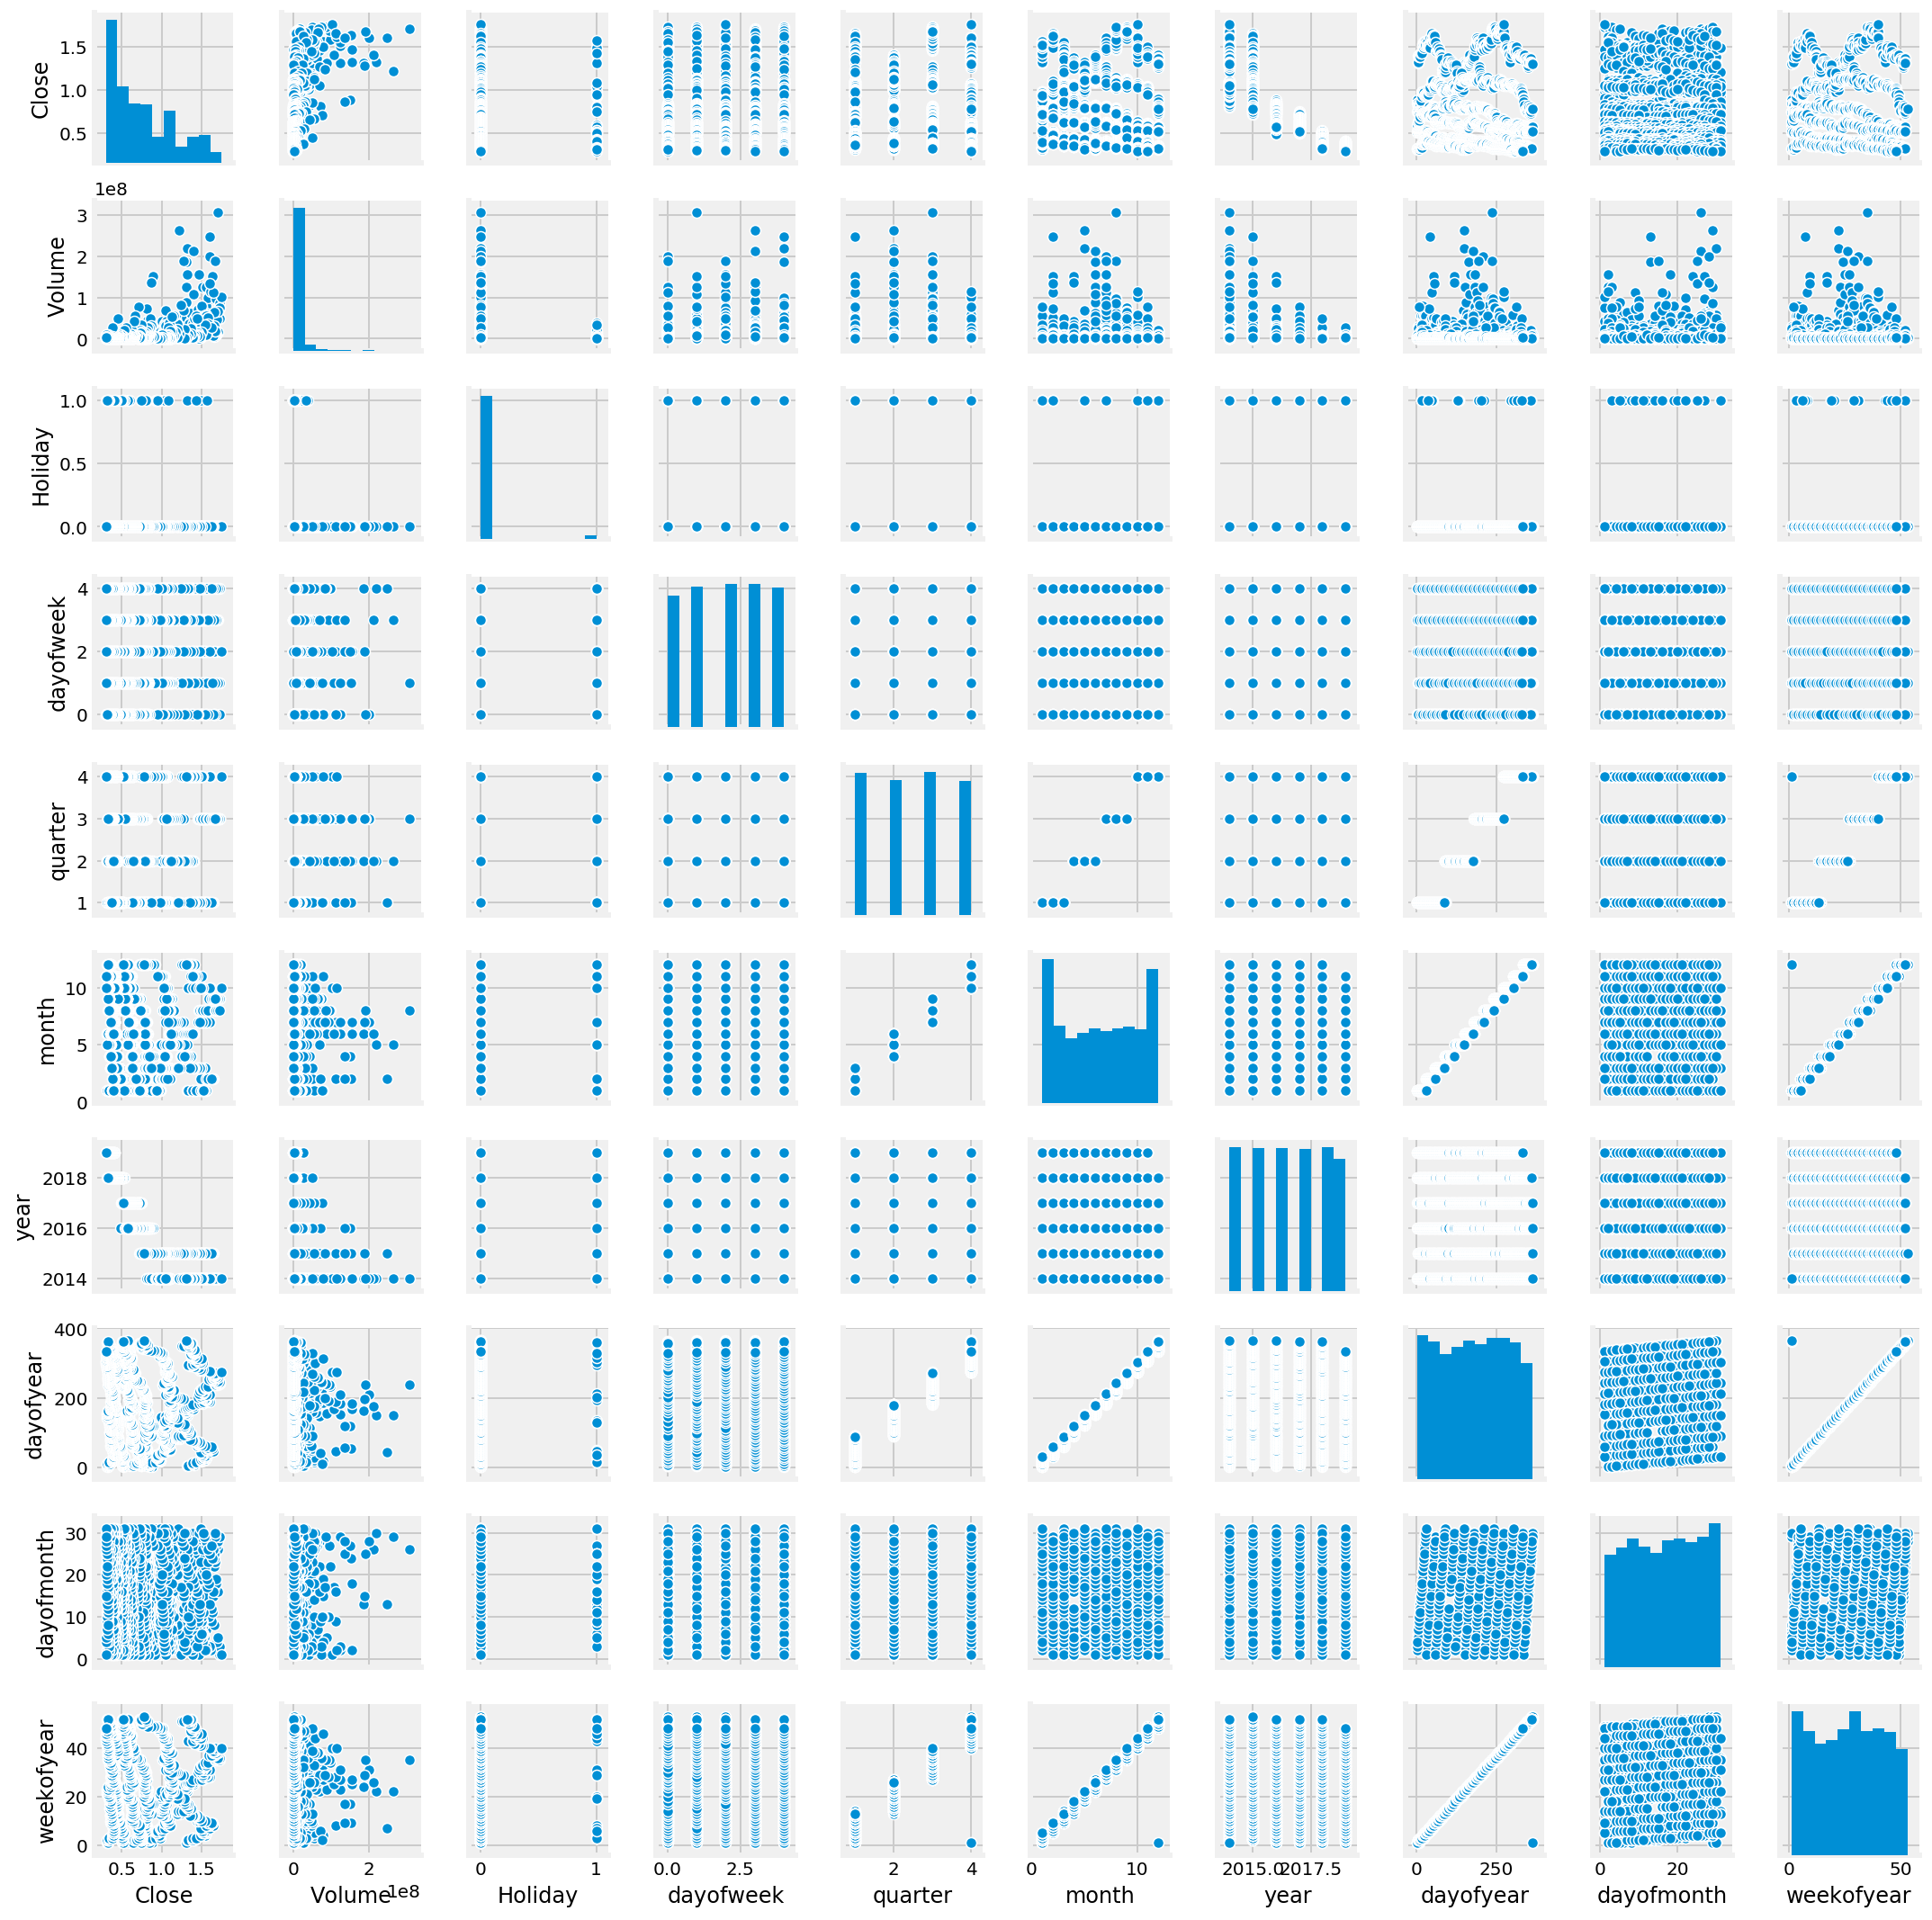

In [8]:
sns.pairplot(data=df,kind='scatter',size=1.5)
plt.savefig('CCP/CCP2.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
#ทศนิยม ปัด
pd.options.display.float_format='{:,.2f}'.format #formats floats to be visible with 3 decimals in the pandas struct.
df.corr()

Close  Volume  Holiday  dayofweek  quarter  month  year  \
Close        1.00    0.47     0.00      -0.02    -0.05  -0.05 -0.90   
Volume       0.47    1.00    -0.02       0.00    -0.04  -0.05 -0.35   
Holiday      0.00   -0.02     1.00       0.00     0.02   0.01 -0.01   
dayofweek   -0.02    0.00     0.00       1.00     0.00   0.01  0.02   
quarter     -0.05   -0.04     0.02       0.00     1.00   0.97 -0.03   
month       -0.05   -0.05     0.01       0.01     0.97   1.00 -0.04   
year        -0.90   -0.35    -0.01       0.02    -0.03  -0.04  1.00   
dayofyear   -0.05   -0.04     0.01       0.01     0.97   1.00 -0.04   
dayofmonth  -0.00    0.04     0.04      -0.01    -0.01  -0.02 -0.01   
weekofyear  -0.05   -0.04     0.01      -0.00     0.96   0.99 -0.04   

            dayofyear  dayofmonth  weekofyear  
Close           -0.05       -0.00       -0.05  
Volume          -0.04        0.04       -0.04  
Holiday          0.01        0.04        0.01  
dayofweek        0.01       -0.01       -0.00  
quarter          0.97       -0.01        0.96  
month            1.00       -0.02        0.99  
year            -0.04       -0.01       -0.04  
dayofyear        1.00        0.07        0.99  
dayofmonth       0.07        1.00        0.06  
weekofyear       0.99        0.06        1.00

In [10]:
%config InlineBackend.figure_format = 'retina'

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Correlations heatmap ของหุ้น CCP')

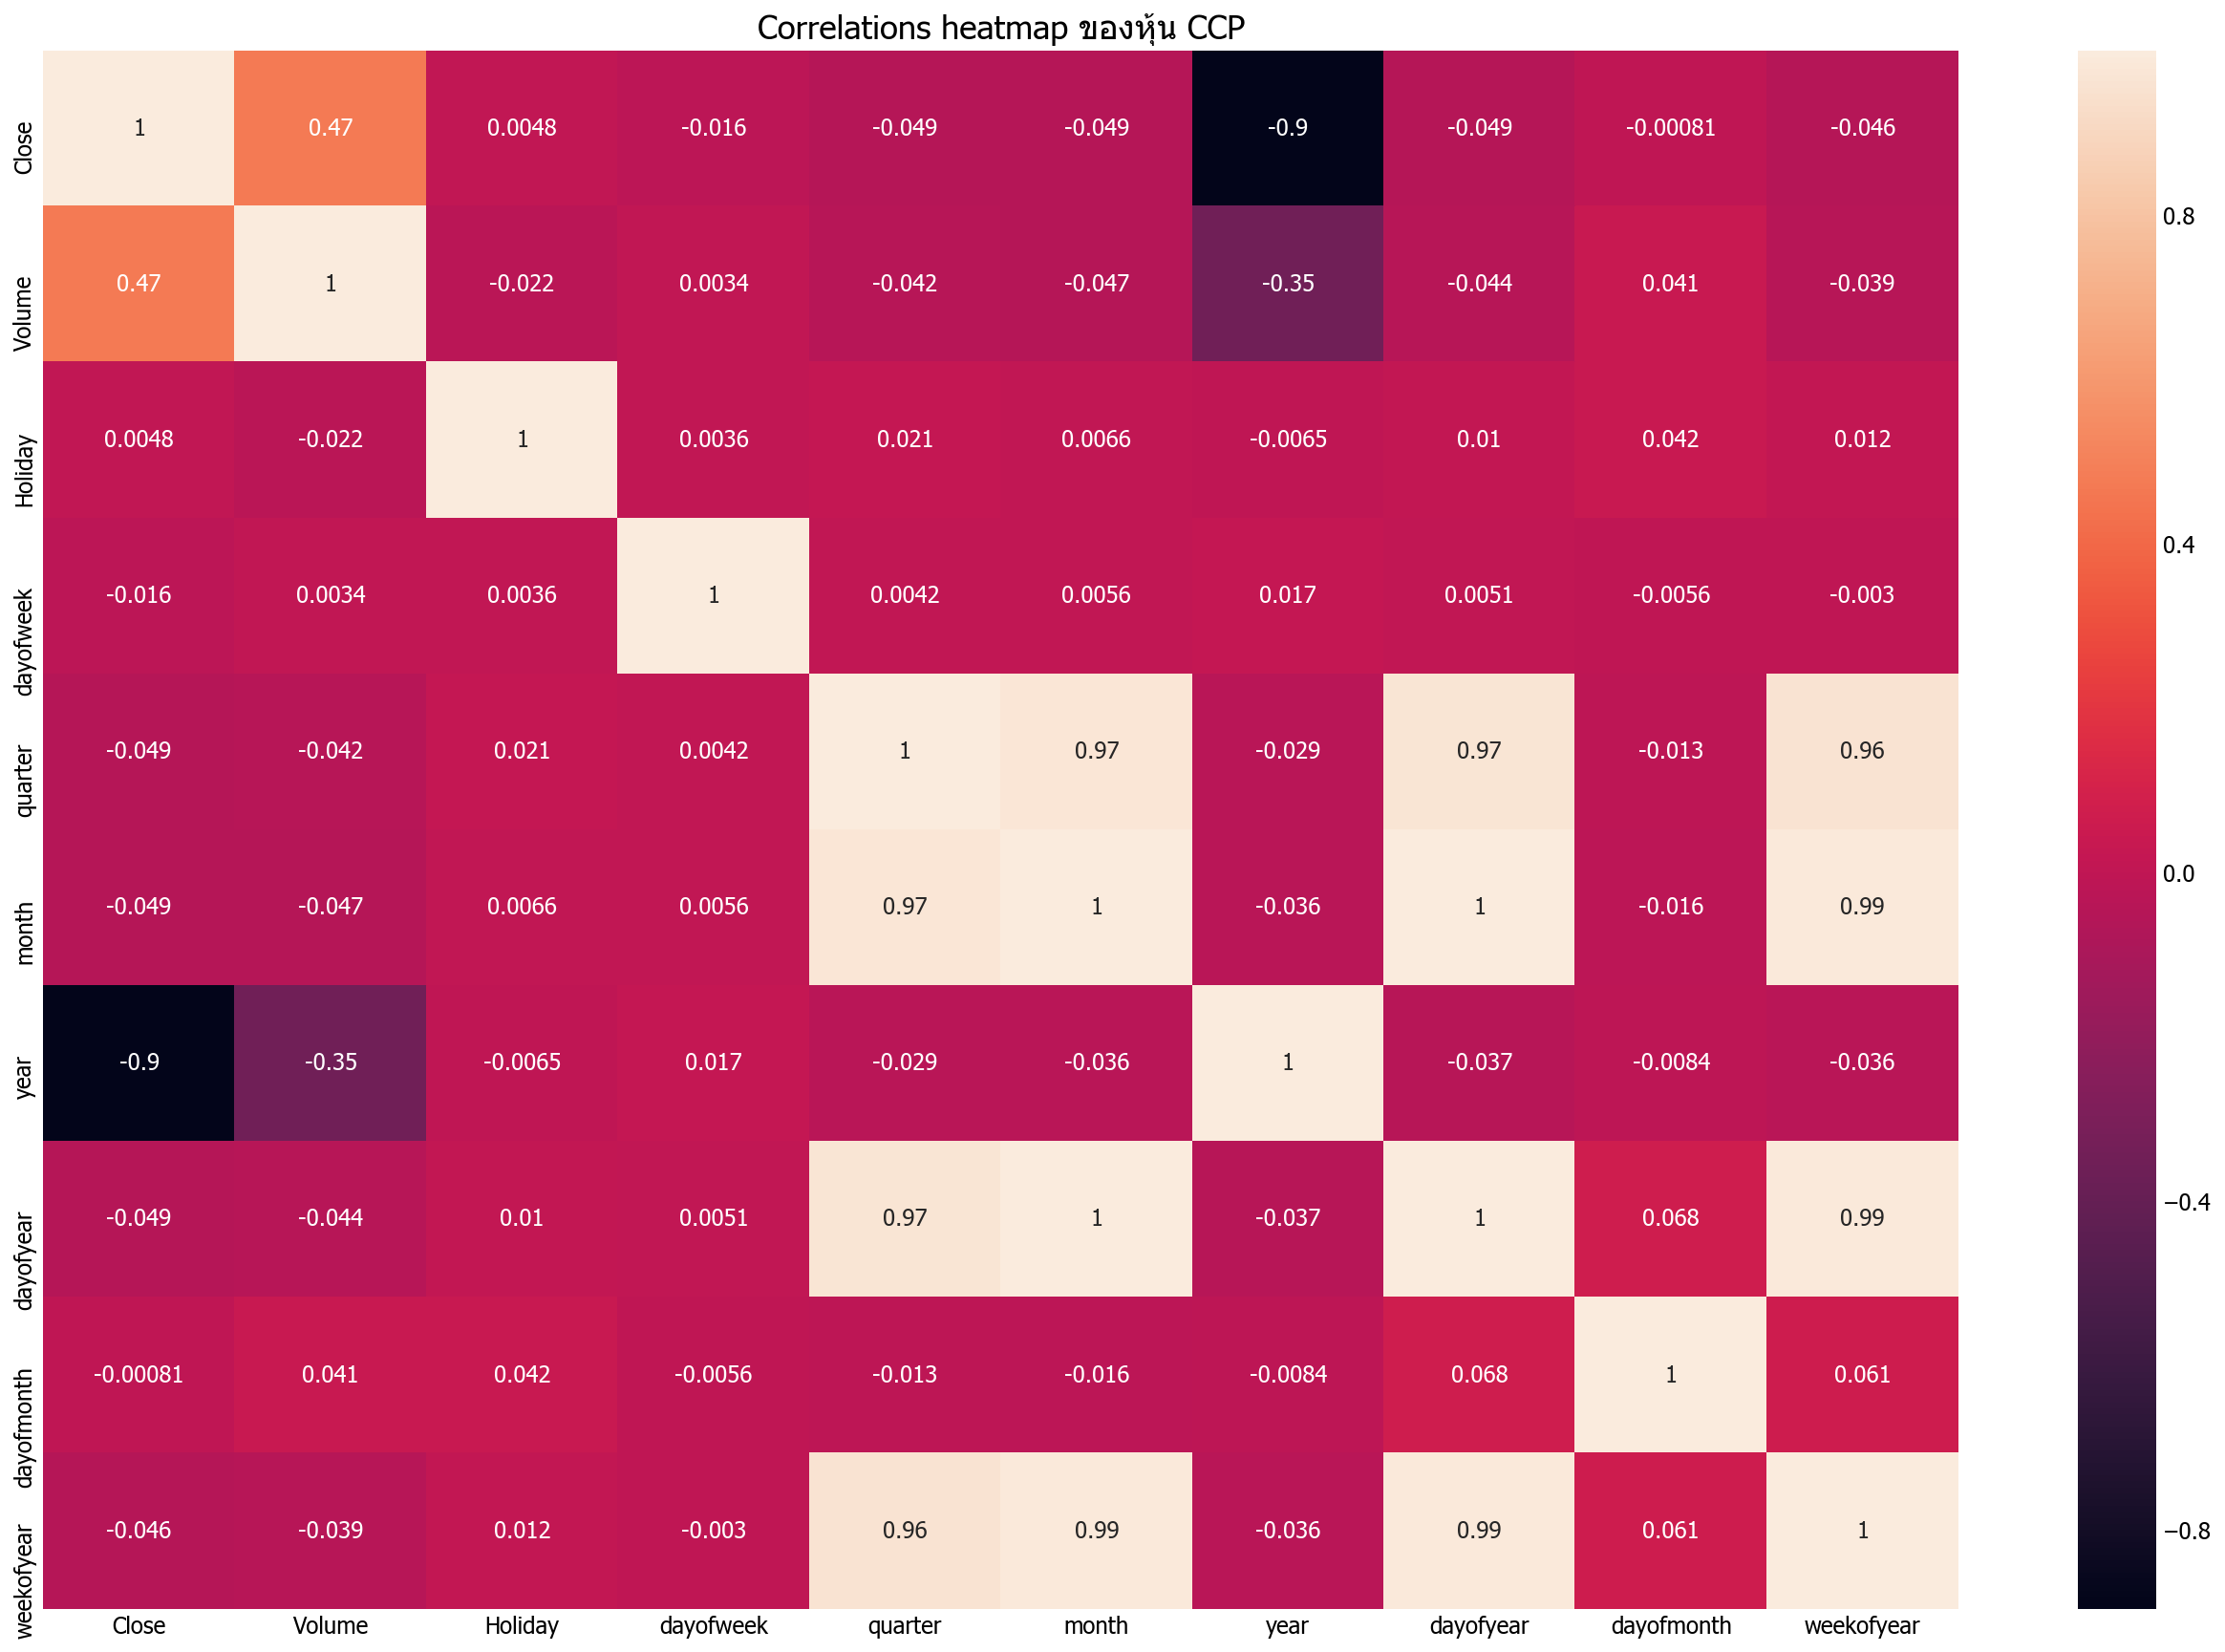

In [11]:
#ฮีทเเมพ
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=12
plt.figure(figsize=(20,15))
plt.title('Correlations heatmap ของหุ้น CCP')
sns.heatmap(df.corr(),annot=True)
# save the figure
plt.savefig('CCP/heatCCP.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = df.drop('Close',1)
y = df['Close']

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 9 artists>

([<matplotlib.axis.YTick at 0x227cdf64828>,
 <a list of 9 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

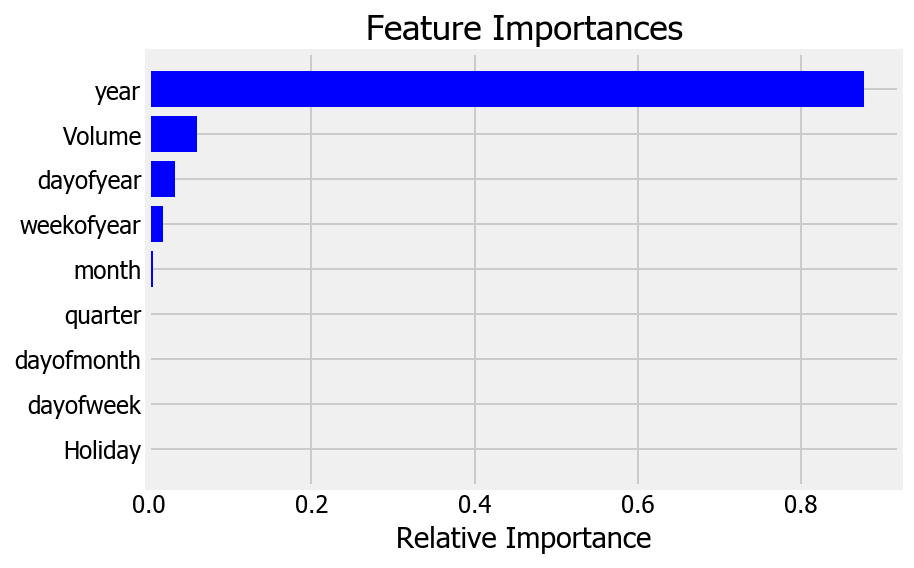

In [13]:
#Feature Importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
X.drop(['Volume', 'dayofweek','Holiday', 'quarter', 'month', 'dayofyear',
       'dayofmonth', 'weekofyear'], 1, inplace=True)

In [15]:
#อันเดียวกับ minmaxscorlar ของ sklearn
SC1 = StandardScaler()
X = SC1.fit_transform(X)
X

array([[-1.45366031],
       [-1.45366031],
       [-1.45366031],
       ...,
       [ 1.49405109],
       [ 1.49405109],
       [ 1.49405109]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1083, 1), (362, 1), (1083,), (362,))

In [17]:
#Linear Regression
from sklearn.linear_model import LinearRegression
Reg1 = LinearRegression()
Reg1.fit(X_train,y_train)
Reg1.score(X_test, y_test),mean_squared_error(y_test, Reg1.predict(X_test)), Reg1.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(0.8255464521493513, 0.024684033999124944, 0.7944278485883419)

In [18]:
y_test[:10].values, Reg1.predict(X_test)[:10]

(array([1.08   , 1.33   , 0.43   , 1.01159, 0.44   , 0.63   , 1.68462,
        0.58   , 0.73   , 1.32692]),
 array([1.05898393, 1.05898393, 0.45410308, 1.26061088, 0.45410308,
        0.85735698, 1.26061088, 0.65573003, 0.85735698, 1.26061088]))

In [19]:
df2 = df['Close']
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns = {'Close': 'ts'})
df2.head()

ts
Date           
2014-01-02 0.89
2014-01-03 0.85
2014-01-06 0.81
2014-01-07 0.85
2014-01-08 0.84

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
     # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(15,10))
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.savefig('CCP/CCP3.jpg', dpi=300, bbox_inches='tight')
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

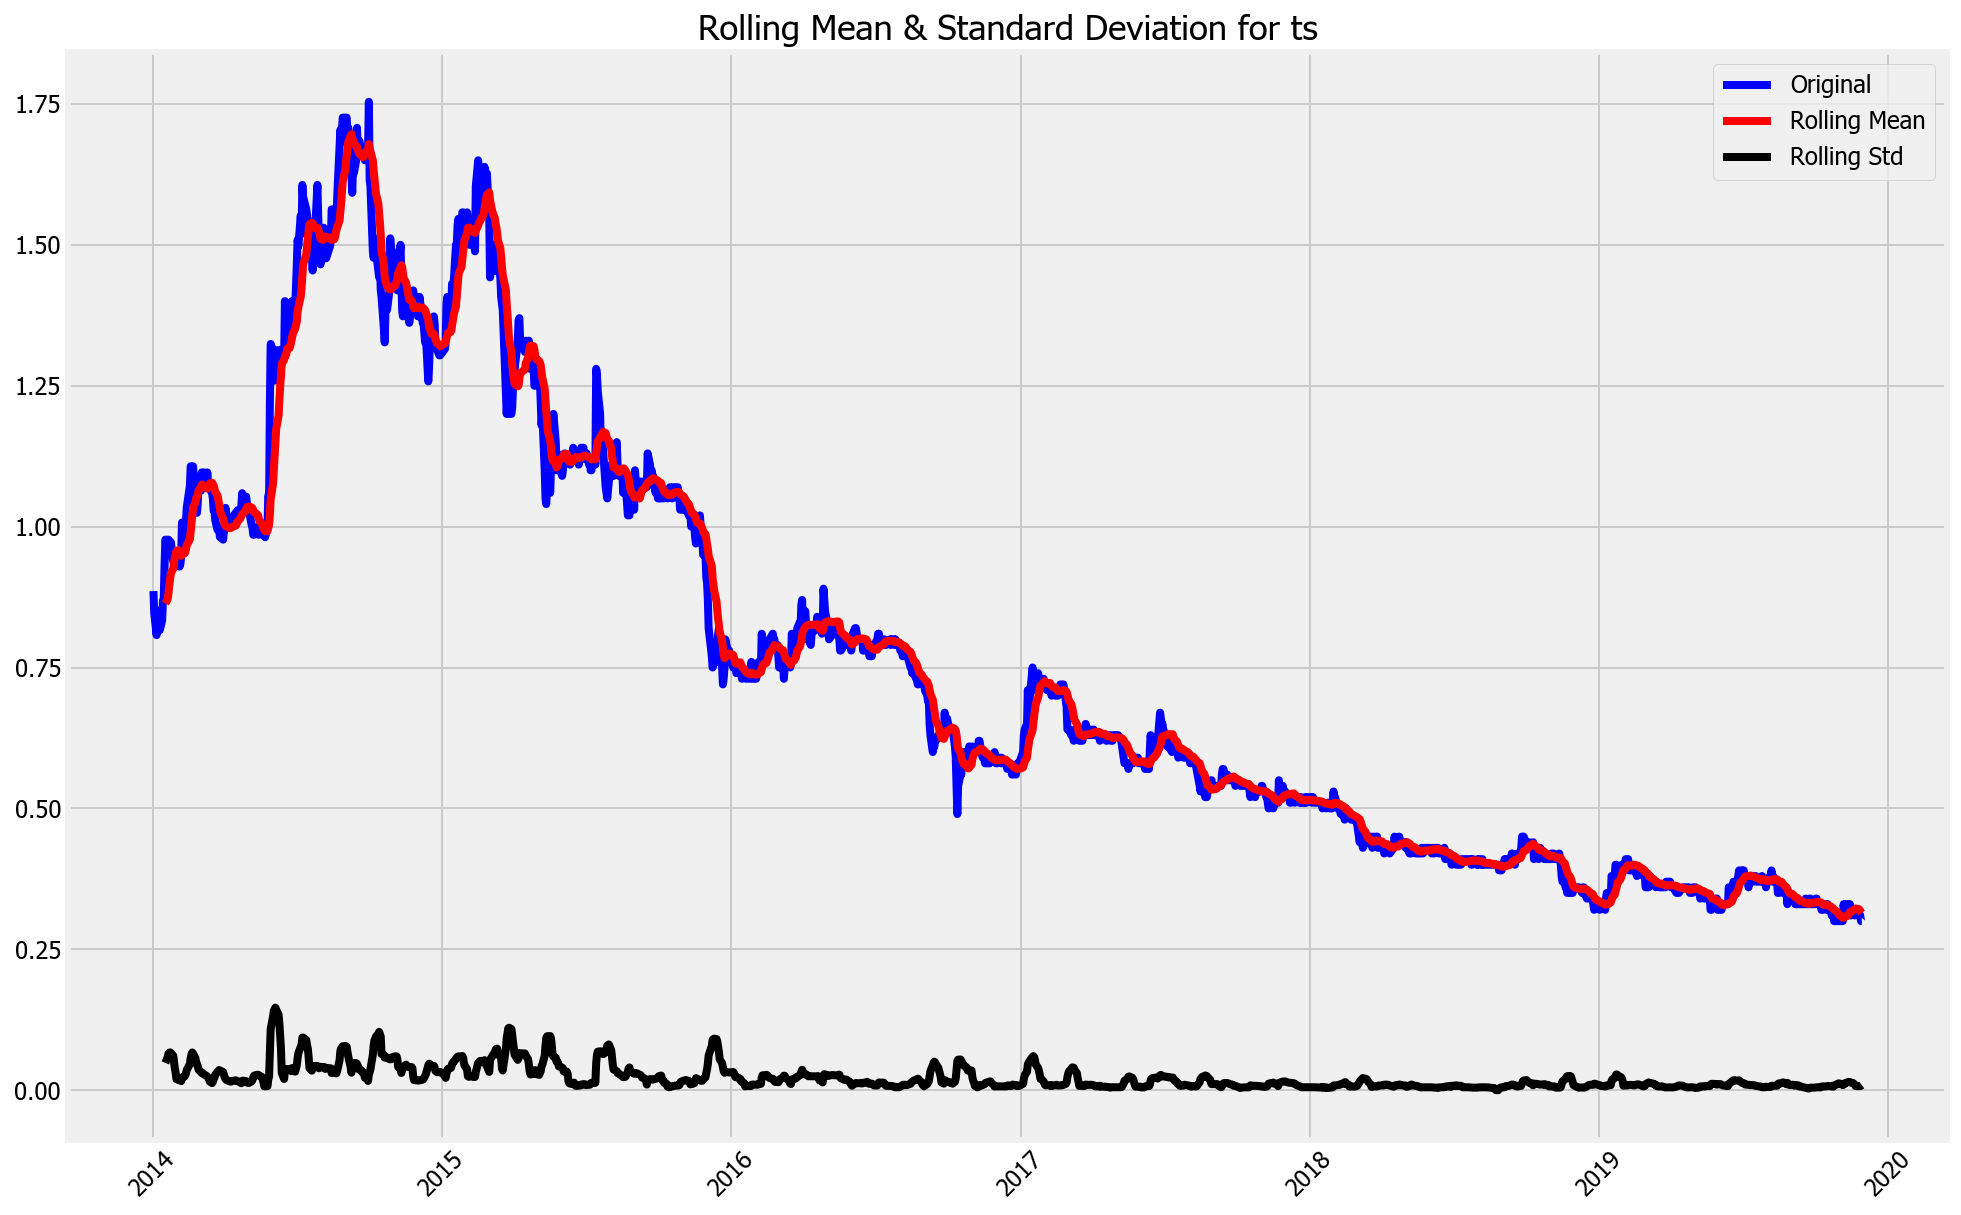

Results of Dickey-Fuller Test:
Test Statistic                   -0.60
p-value                           0.87
# Lags Used                      15.00
Number of Observations Used   1,429.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [21]:
test_stationarity(df = df2, ts = 'ts')

In [22]:
def plot_transformed_data(df, ts, ts_transform):
  """
  Plot transformed and original time series data
  """
  f, ax = plt.subplots(1,1)
  ax.plot(df[ts])
  ax.plot(df[ts_transform], color = 'red')
  ax.set_title('%s and %s time-series graph' %(ts, ts_transform))
  ax.tick_params(axis = 'x', rotation = 45)
  ax.legend([ts, ts_transform])
  plt.show()
  plt.close()
  return

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ts  ts_log  ts_log_moving_avg  ts_moving_avg  ts_log_diff  \
Date                                                                     
2014-01-10 0.82   -0.20              -0.17           0.84        -0.03   
2014-01-13 0.83   -0.18              -0.18           0.83         0.02   
2014-01-14 0.87   -0.14              -0.18           0.84         0.04   
2014-01-15 0.87   -0.14              -0.17           0.85         0.00   
2014-01-16 0.93   -0.07              -0.16           0.86         0.06   

            ts_moving_avg_diff  ts_log_moving_avg_diff  ts_log_ewma  \
Date                                                                  
2014-01-10               -0.02                   -0.03        -0.20   
2014-01-13                0.00                    0.00        -0.19   
2014-01-14                0.03                    0.04        -0.17   
2014-01-15                0.03                    0.03        -0.16   
2014-01-16                0.07                    0.08        -0.14   

            ts_log_ewma_diff  
Date                          
2014-01-10              0.00  
2014-01-13              0.01  
2014-01-14              0.03  
2014-01-15              0.03  
2014-01-16              0.07

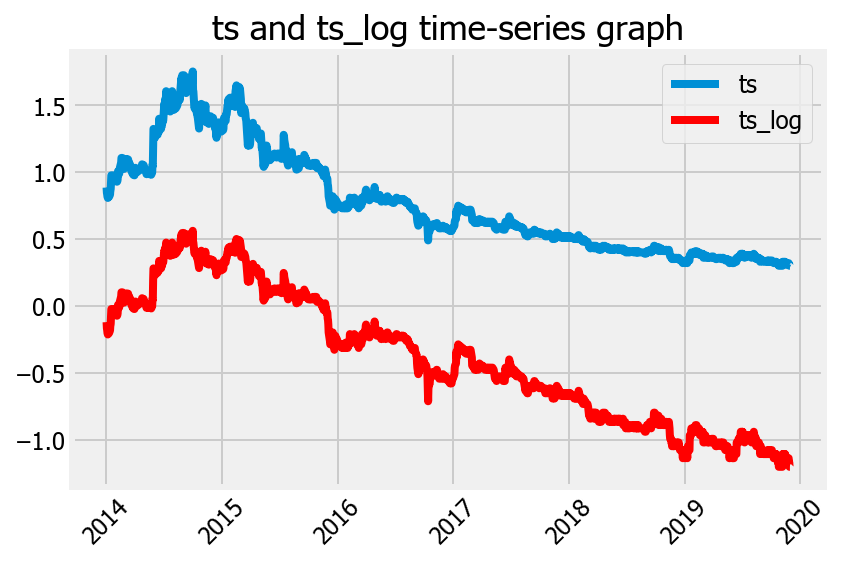

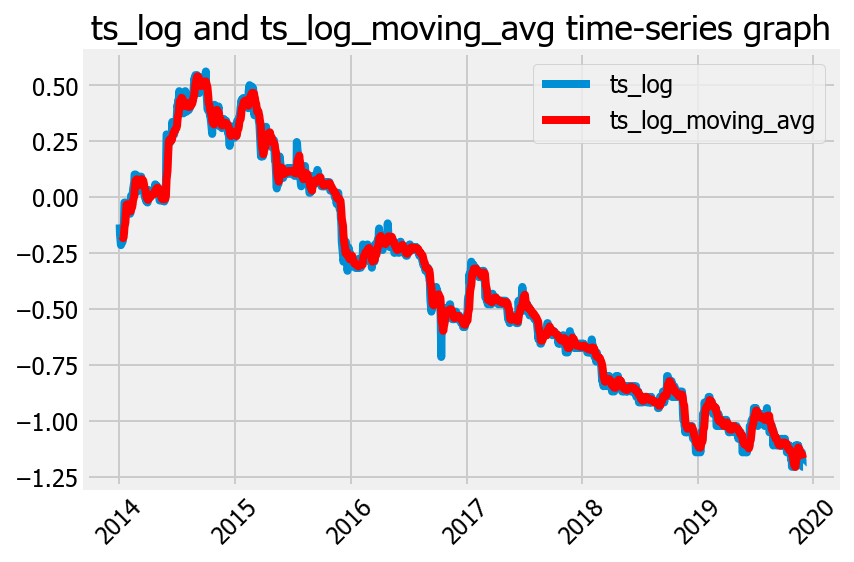

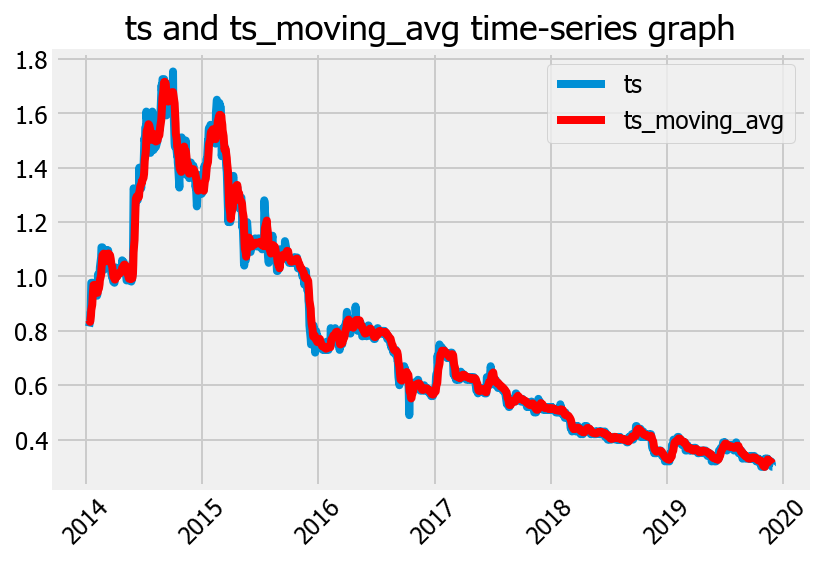

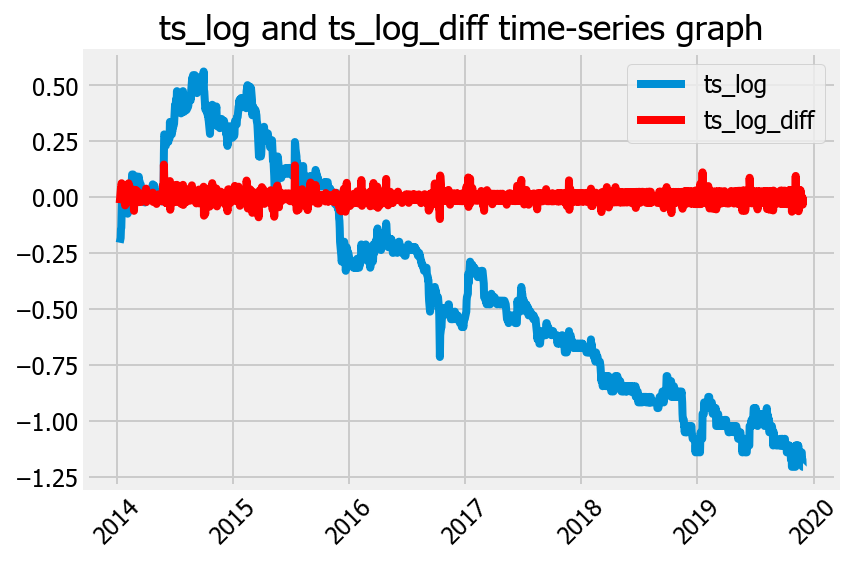

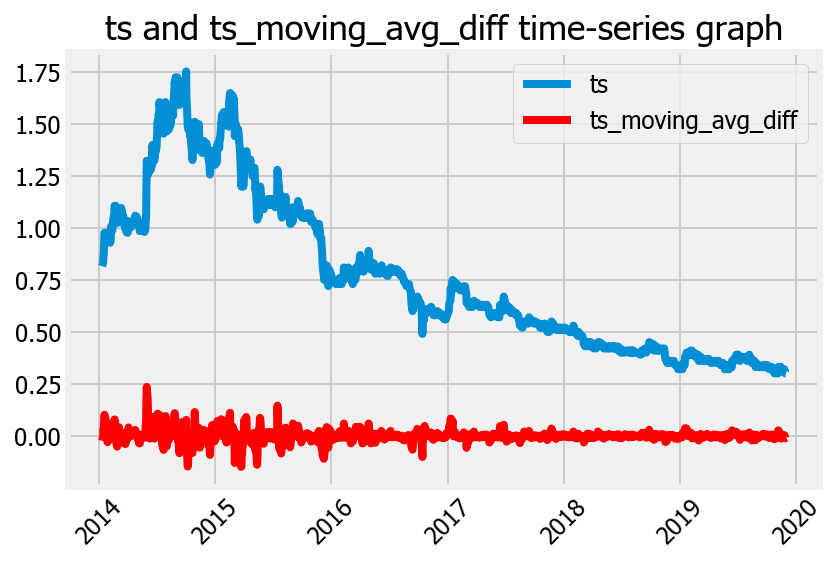

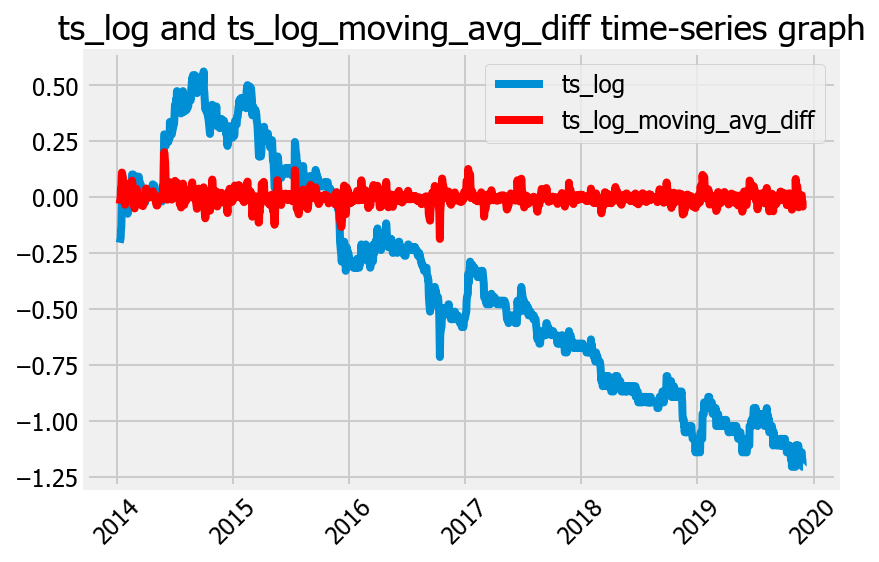

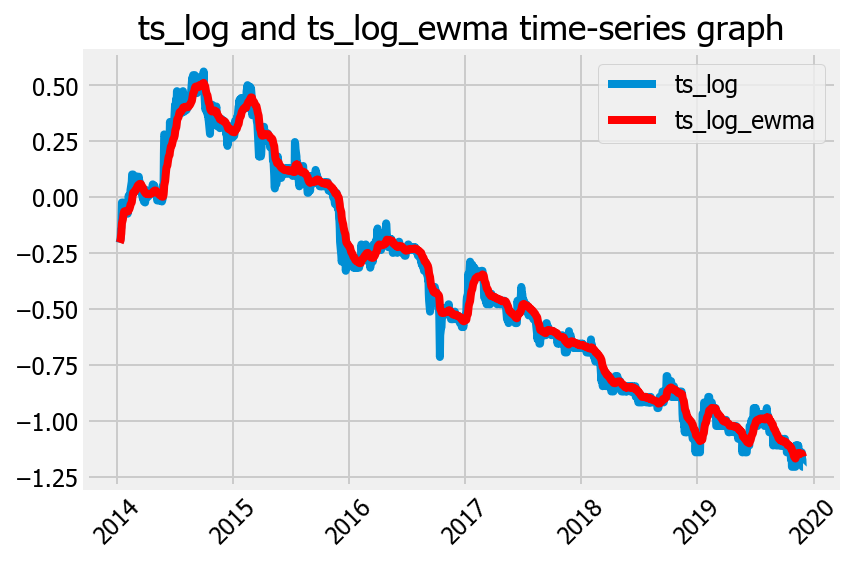

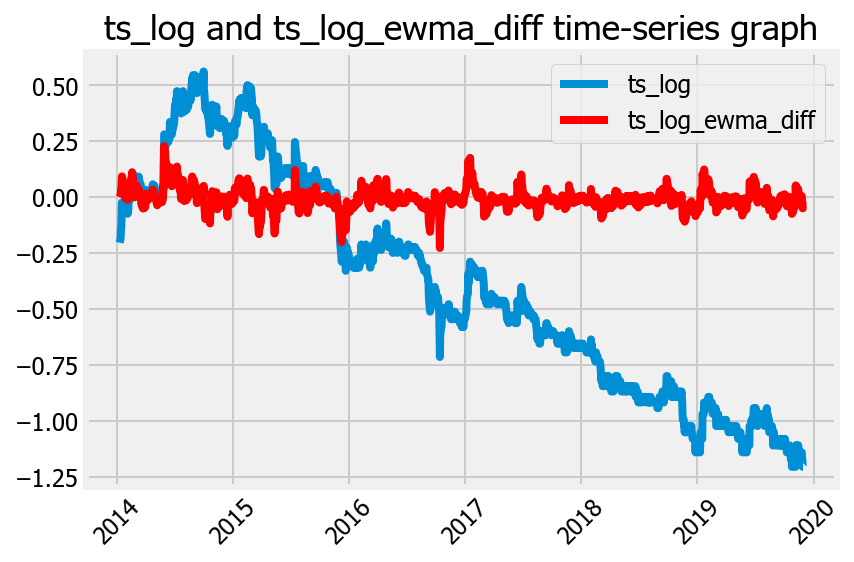

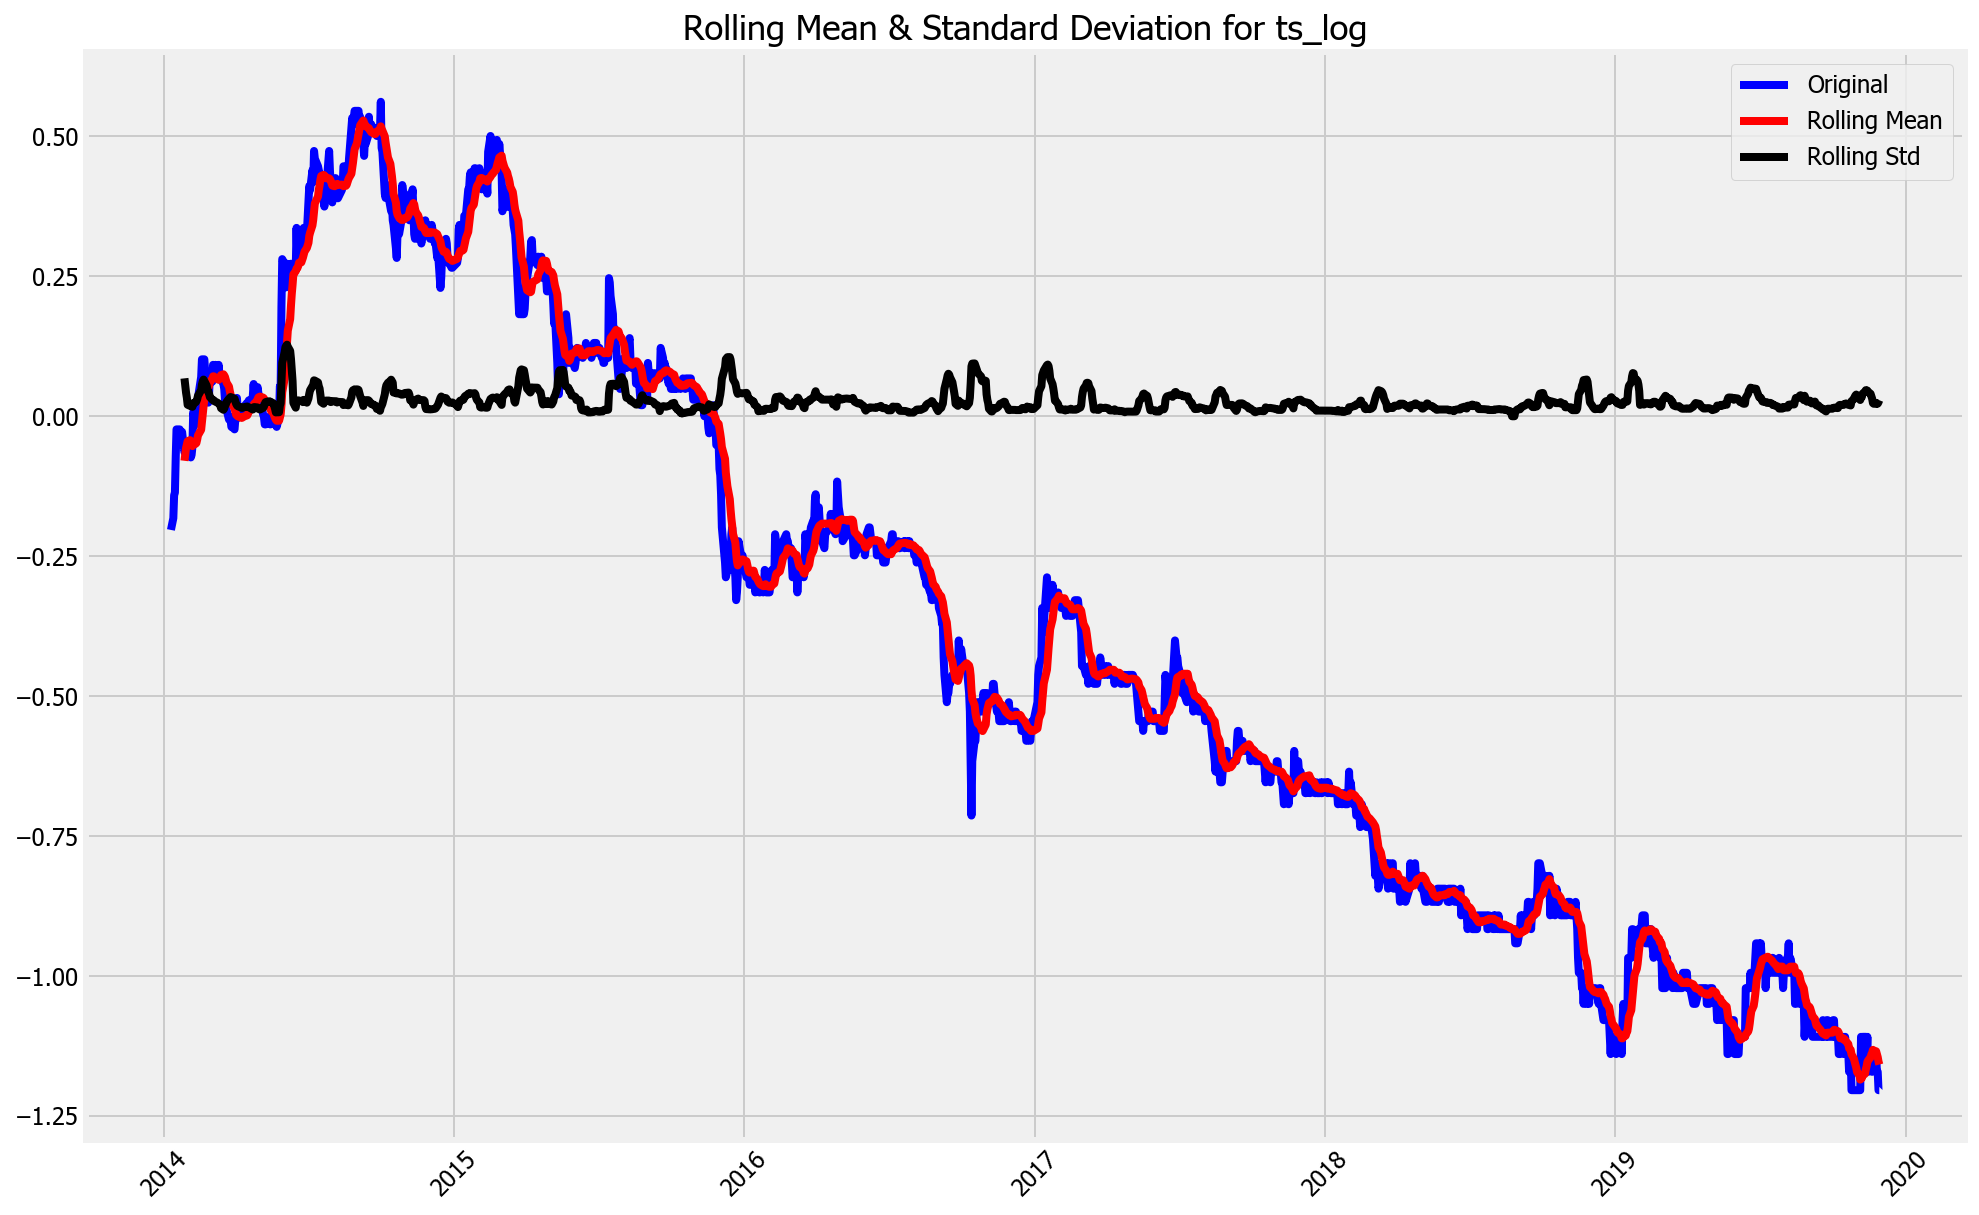

Results of Dickey-Fuller Test:
Test Statistic                   -0.09
p-value                           0.95
# Lags Used                       1.00
Number of Observations Used   1,437.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


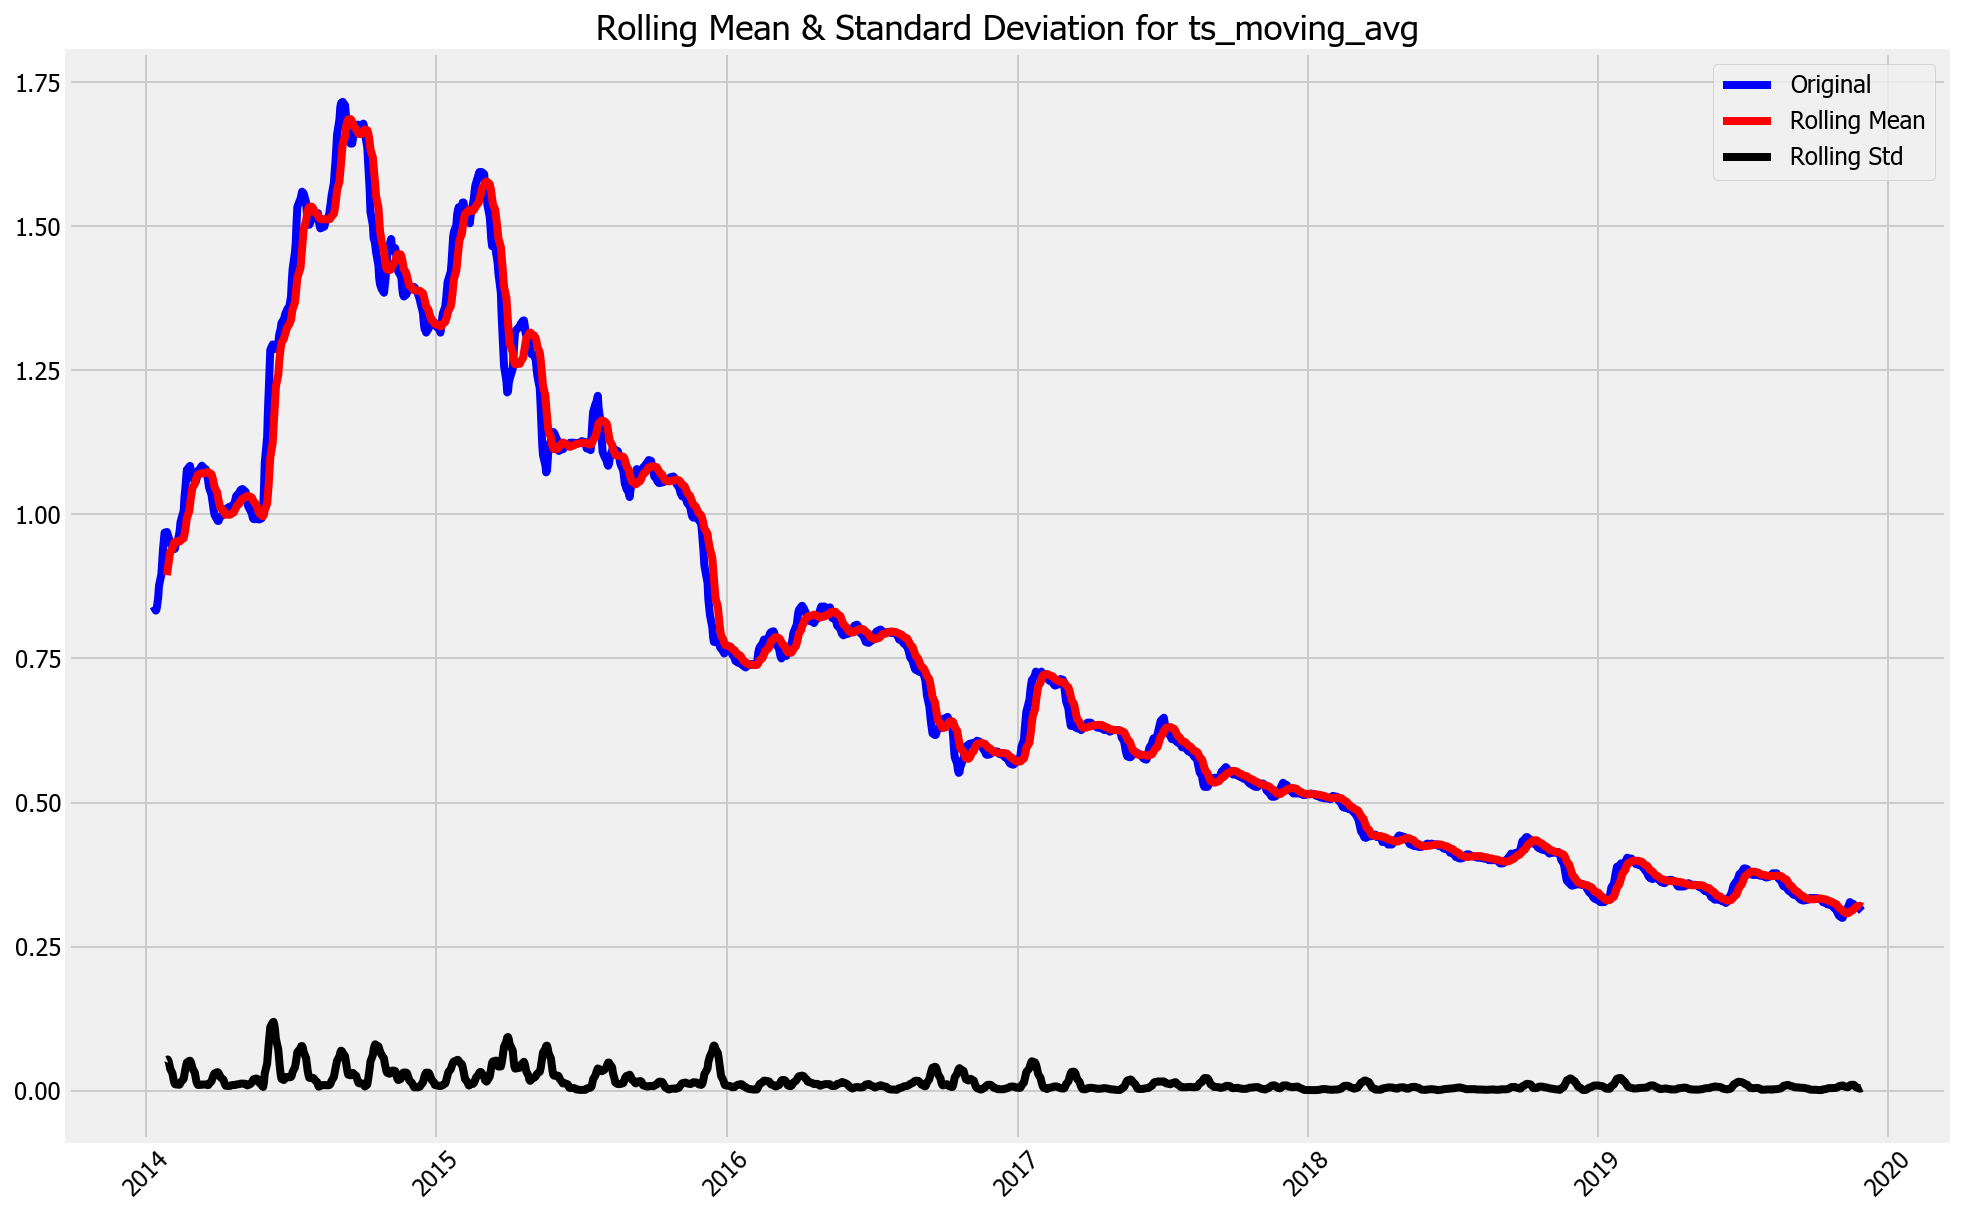

Results of Dickey-Fuller Test:
Test Statistic                   -1.03
p-value                           0.74
# Lags Used                      22.00
Number of Observations Used   1,416.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


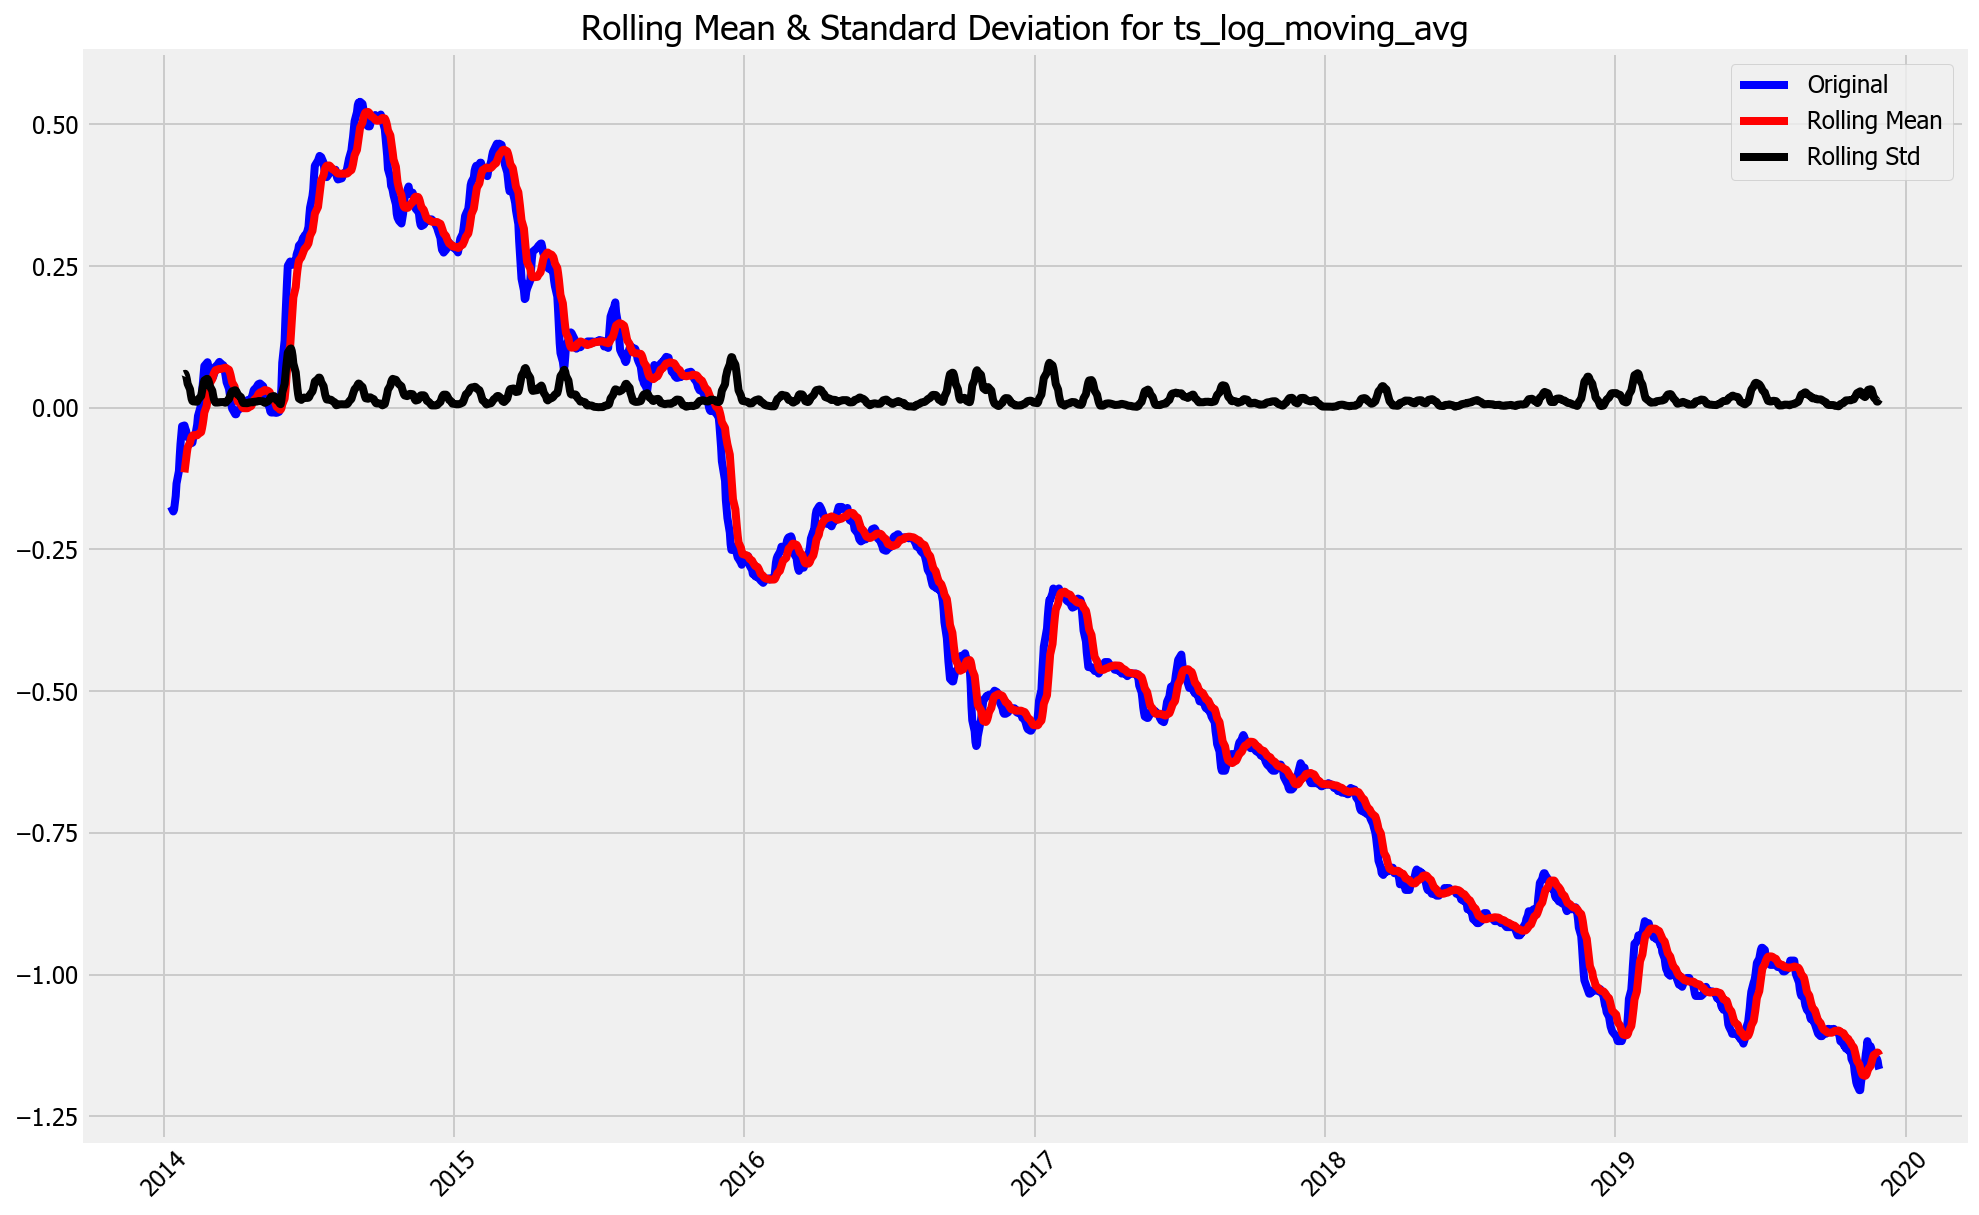

Results of Dickey-Fuller Test:
Test Statistic                   -0.42
p-value                           0.91
# Lags Used                      22.00
Number of Observations Used   1,416.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


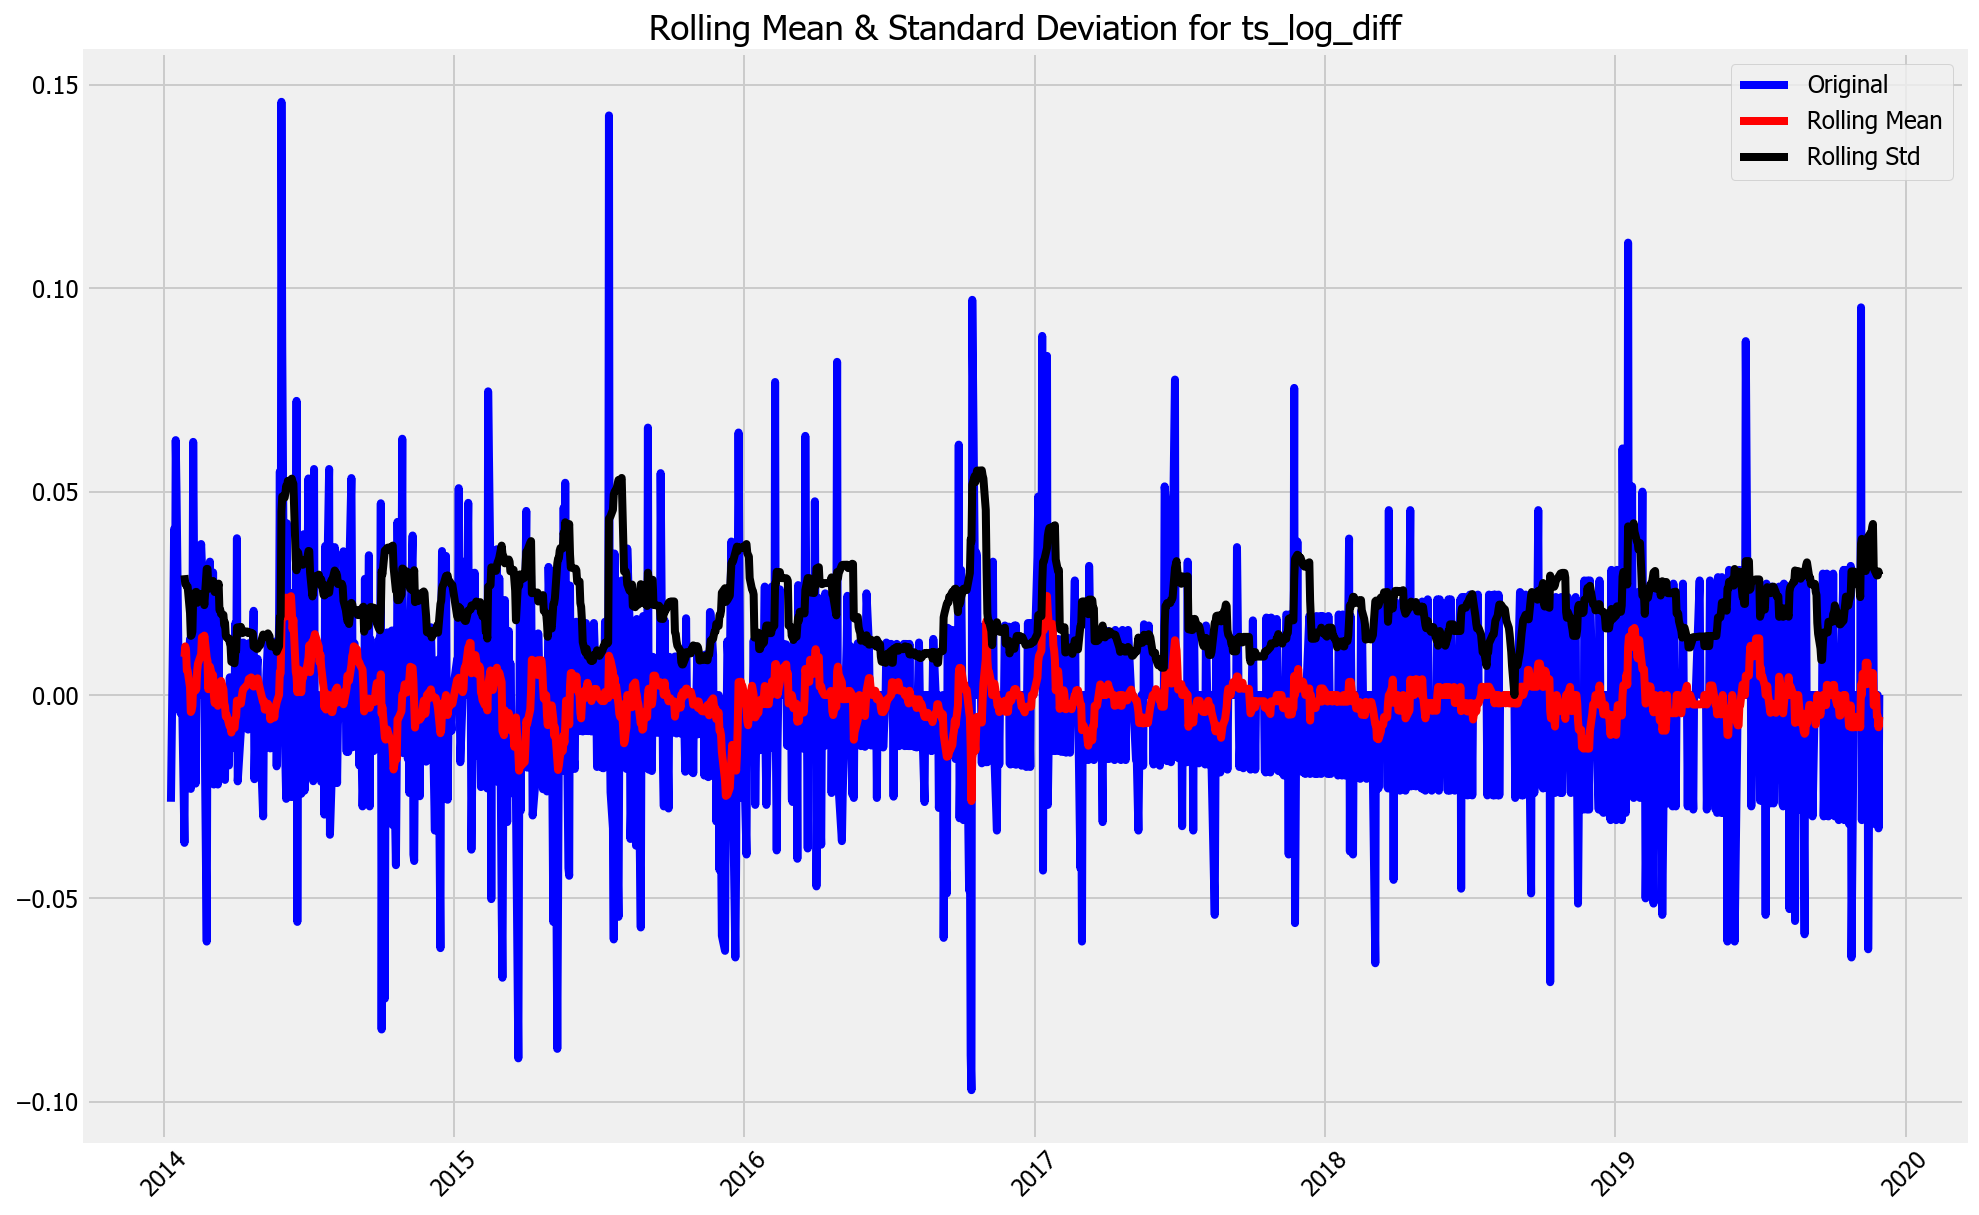

Results of Dickey-Fuller Test:
Test Statistic                  -40.28
p-value                           0.00
# Lags Used                       0.00
Number of Observations Used   1,438.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


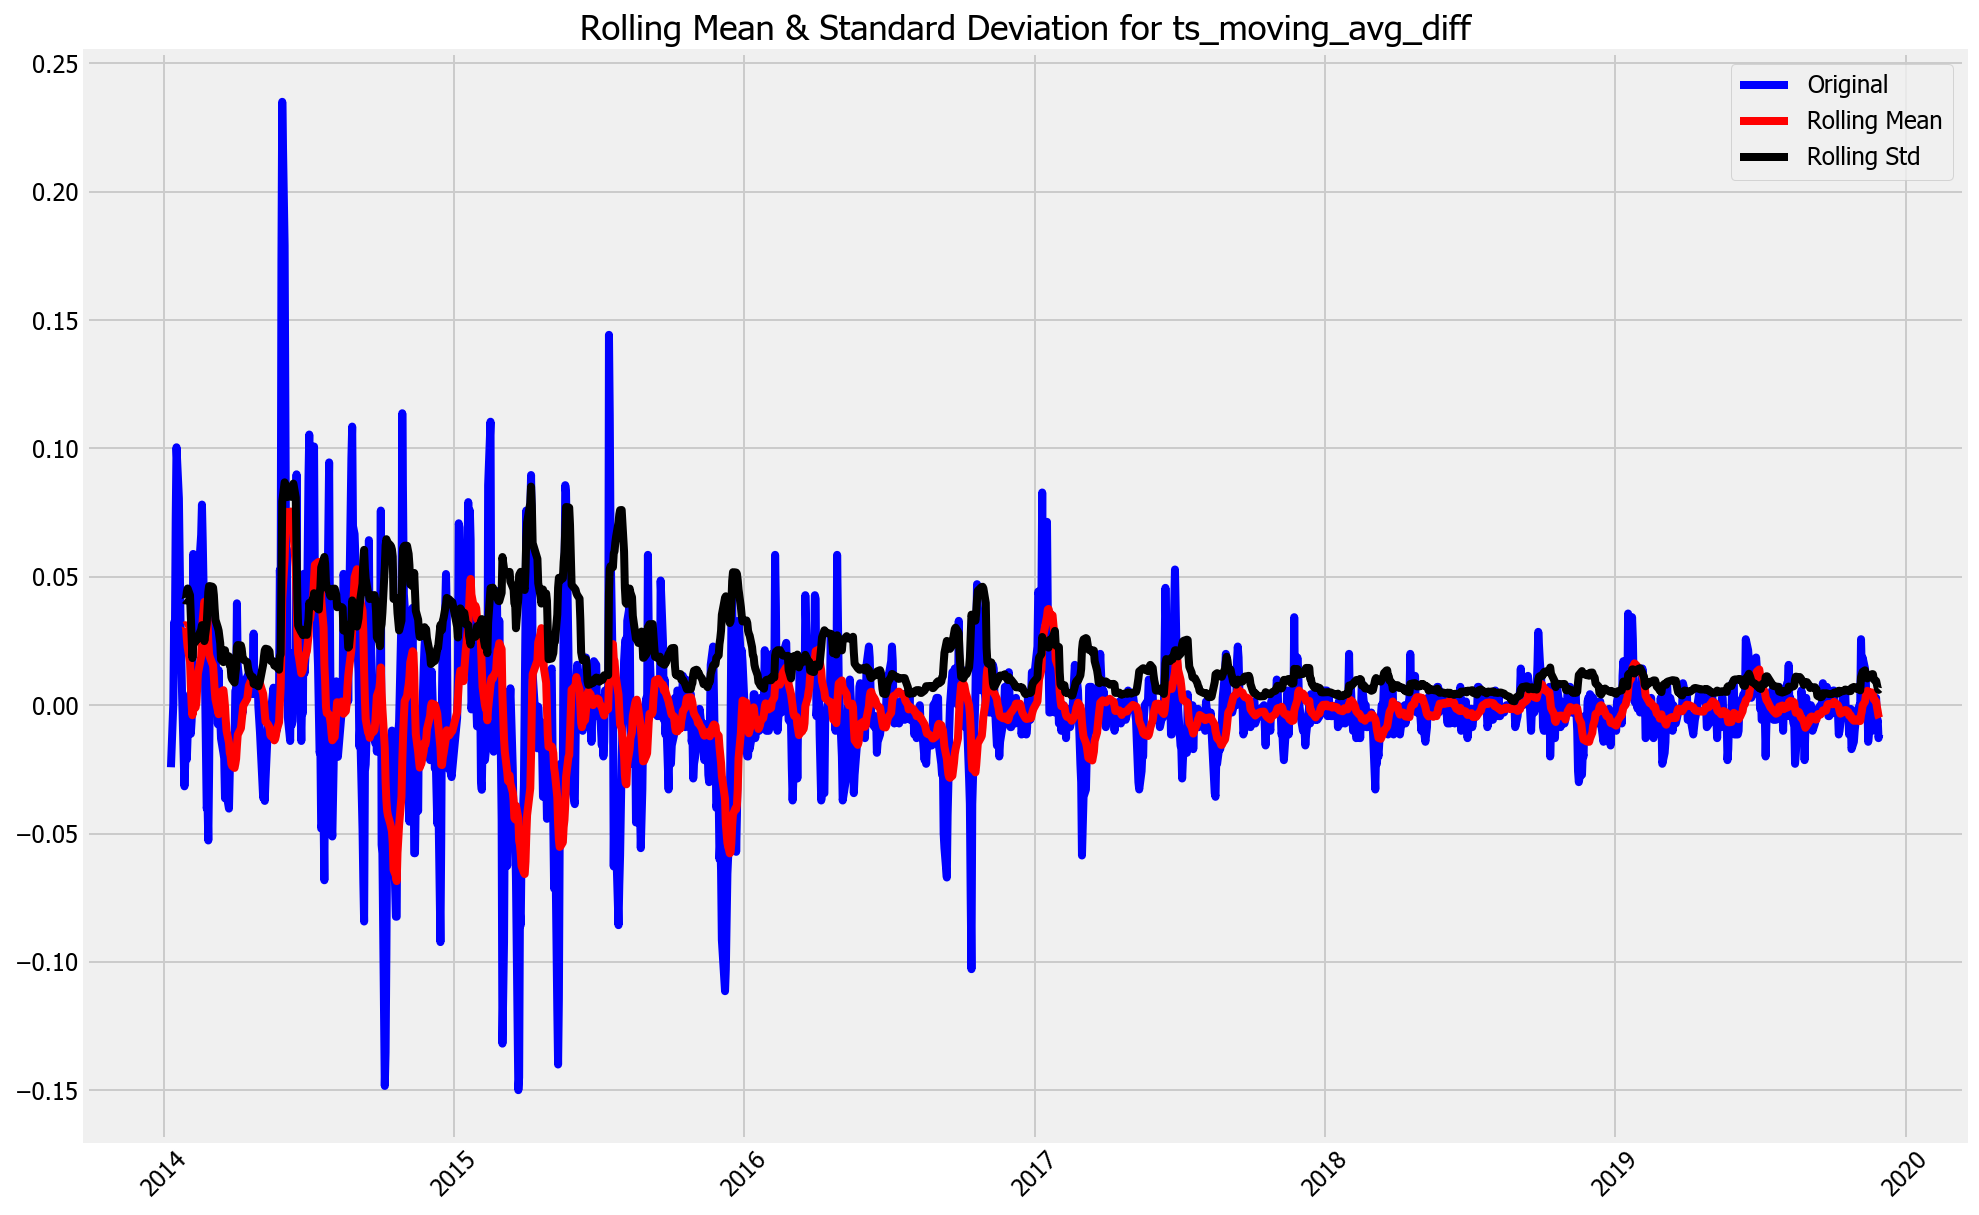

Results of Dickey-Fuller Test:
Test Statistic                   -8.00
p-value                           0.00
# Lags Used                      16.00
Number of Observations Used   1,422.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


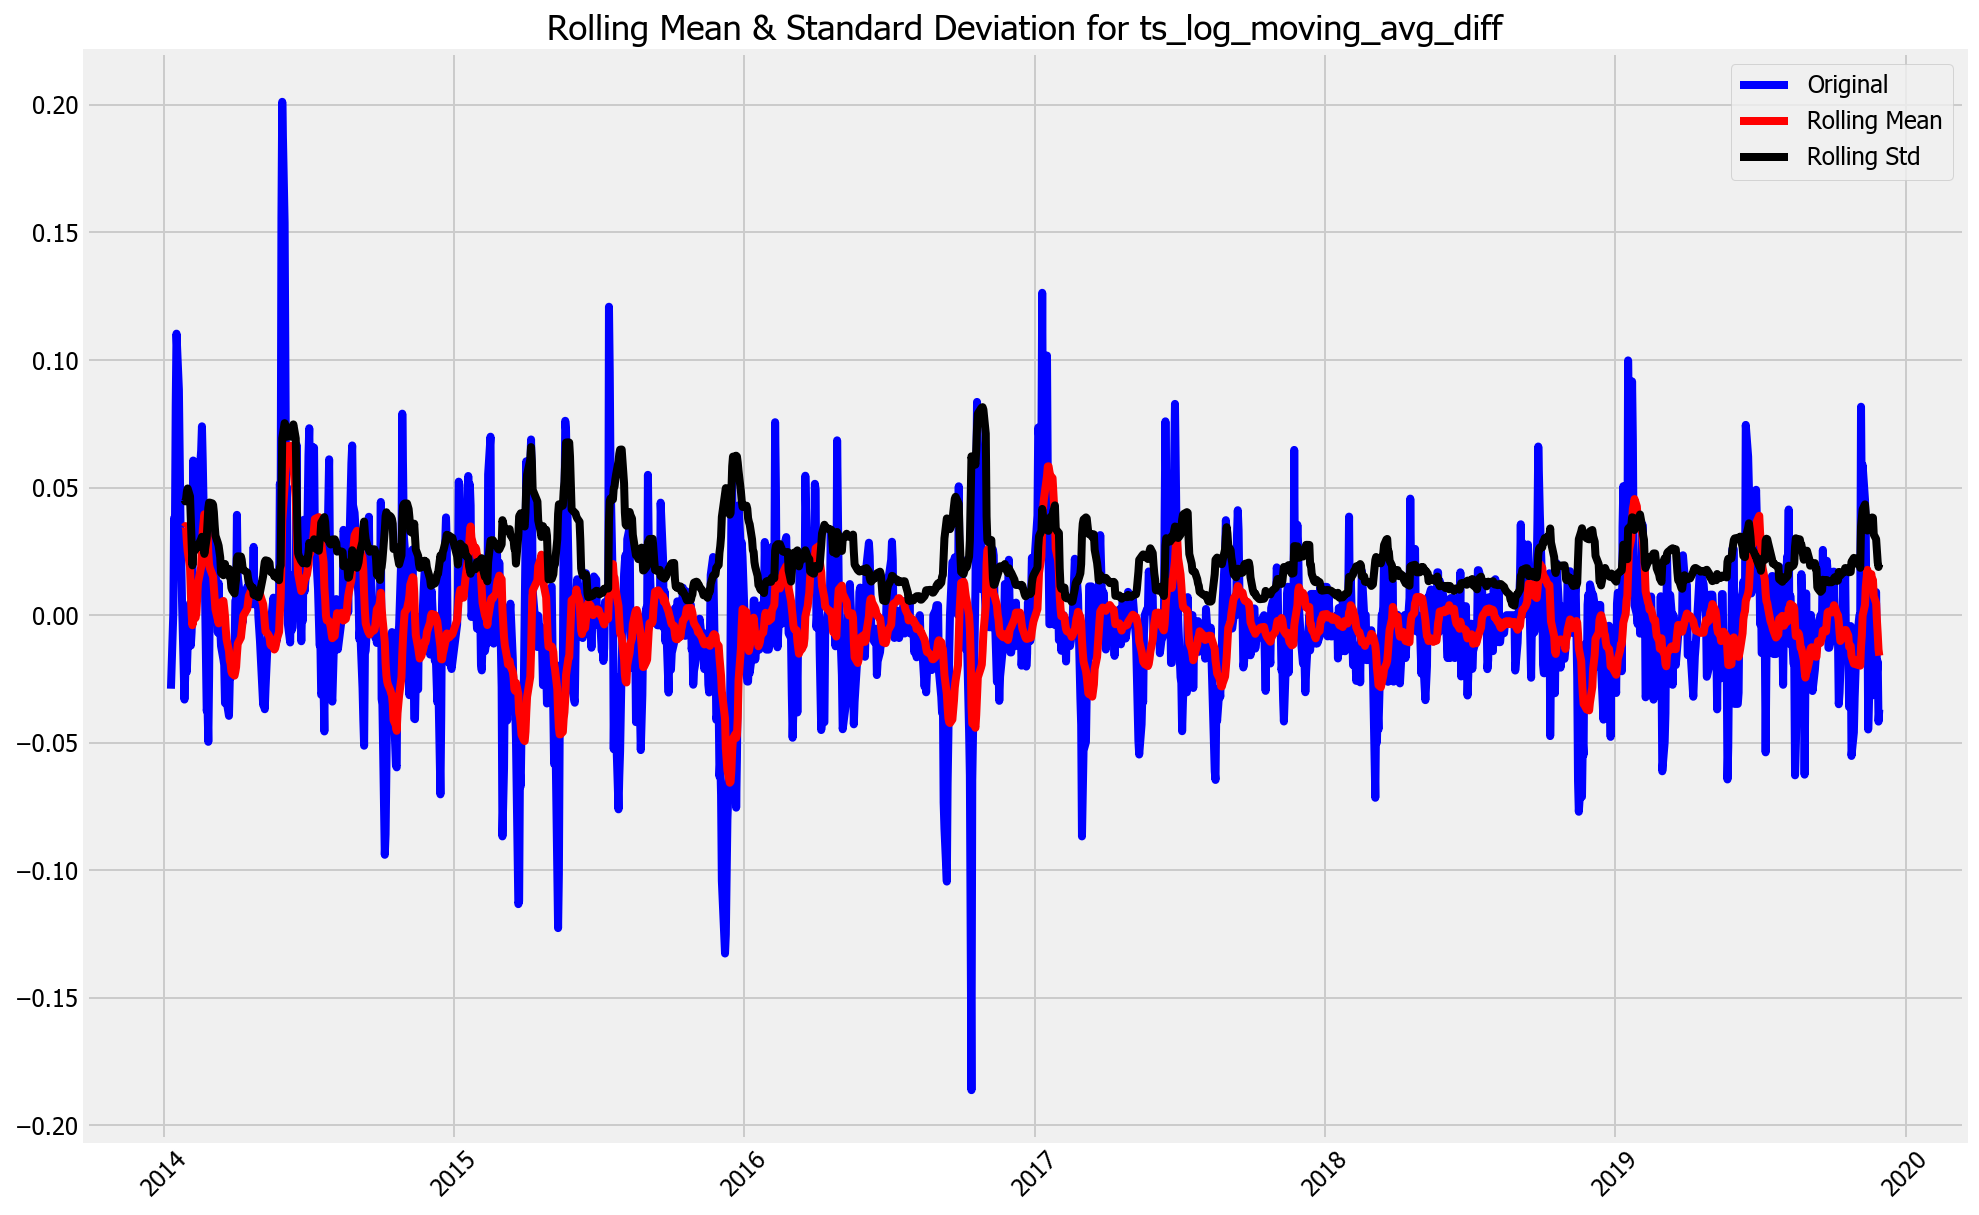

Results of Dickey-Fuller Test:
Test Statistic                   -9.74
p-value                           0.00
# Lags Used                      13.00
Number of Observations Used   1,425.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


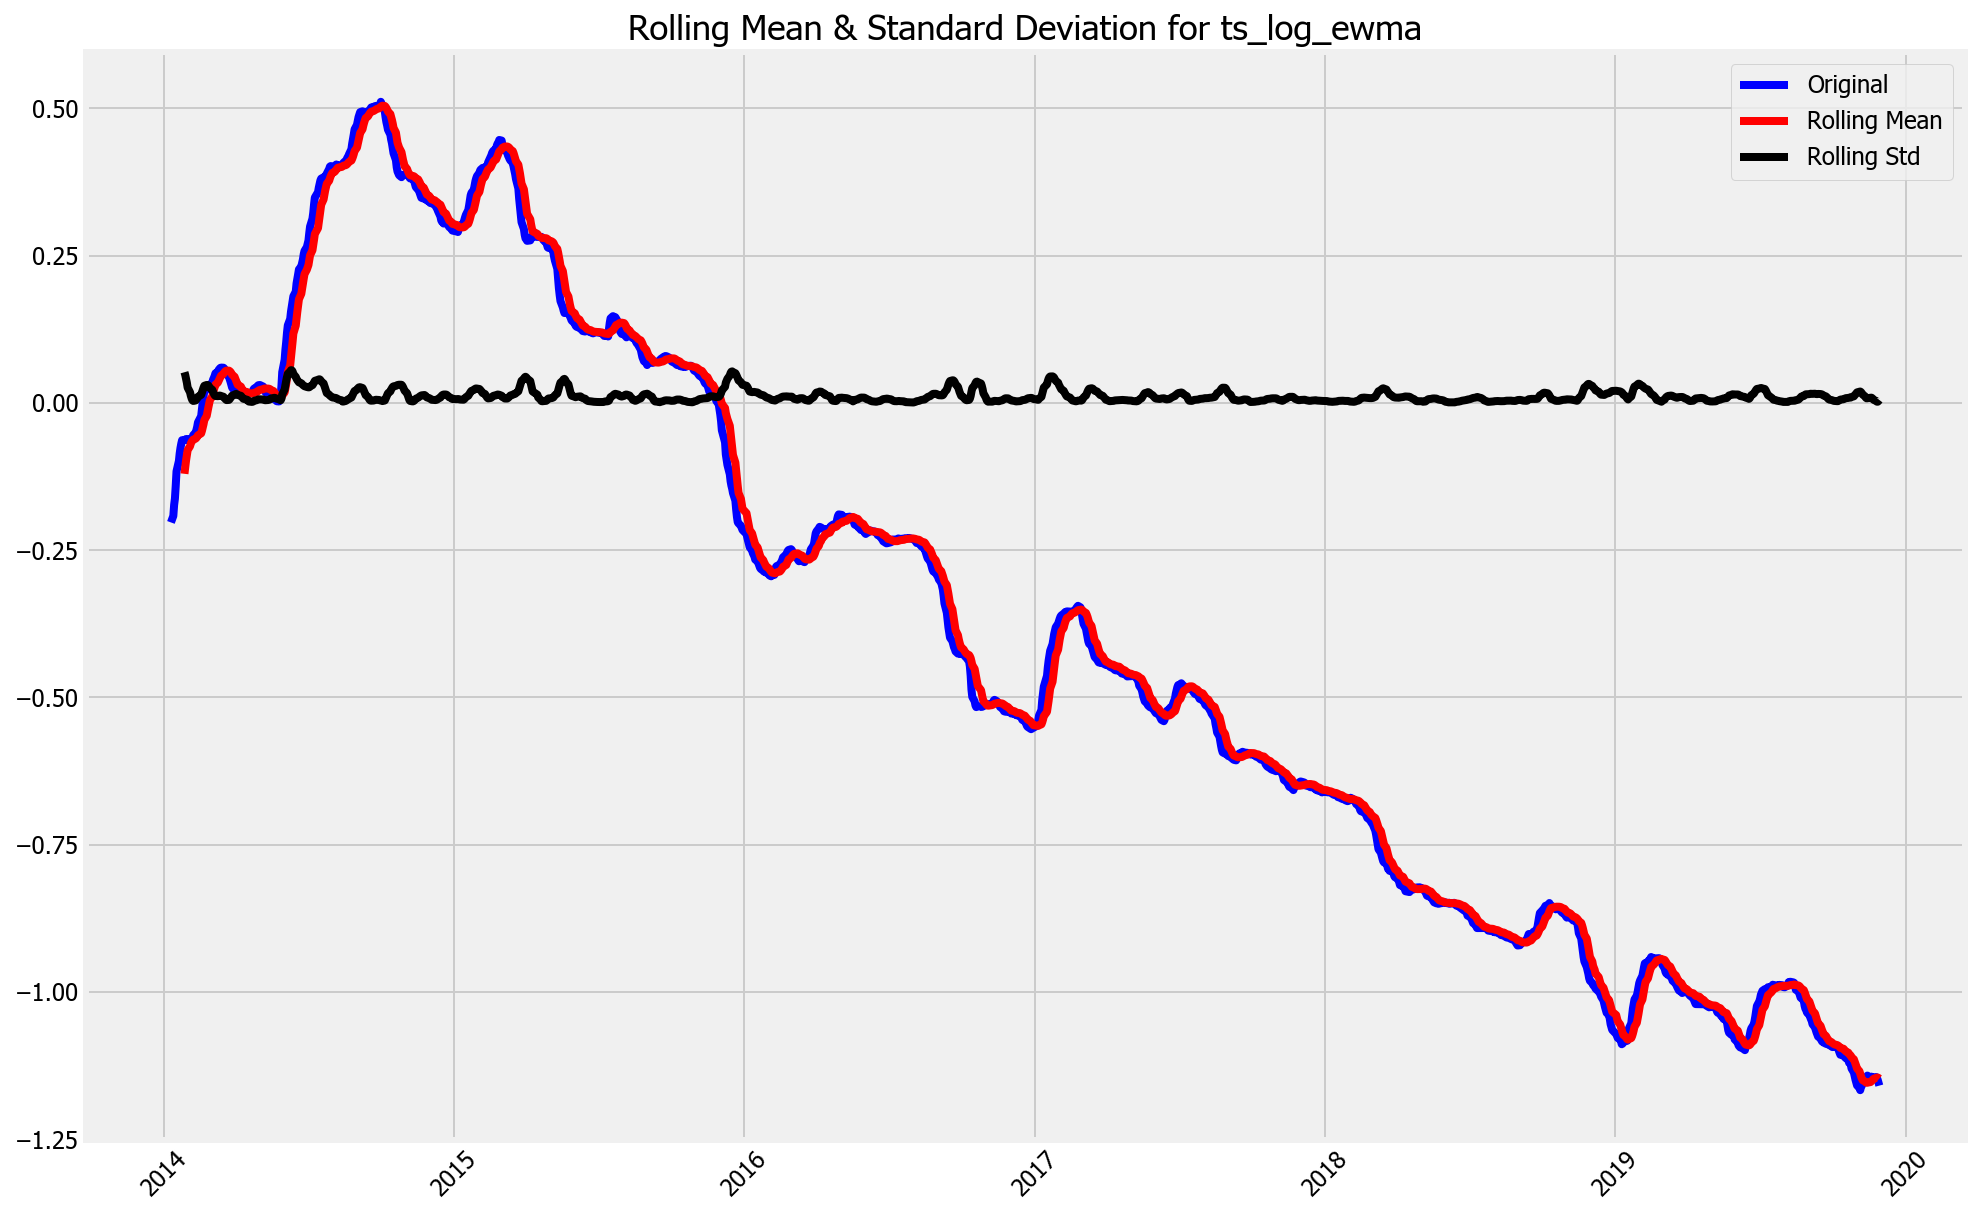

Results of Dickey-Fuller Test:
Test Statistic                   -0.03
p-value                           0.96
# Lags Used                       2.00
Number of Observations Used   1,436.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


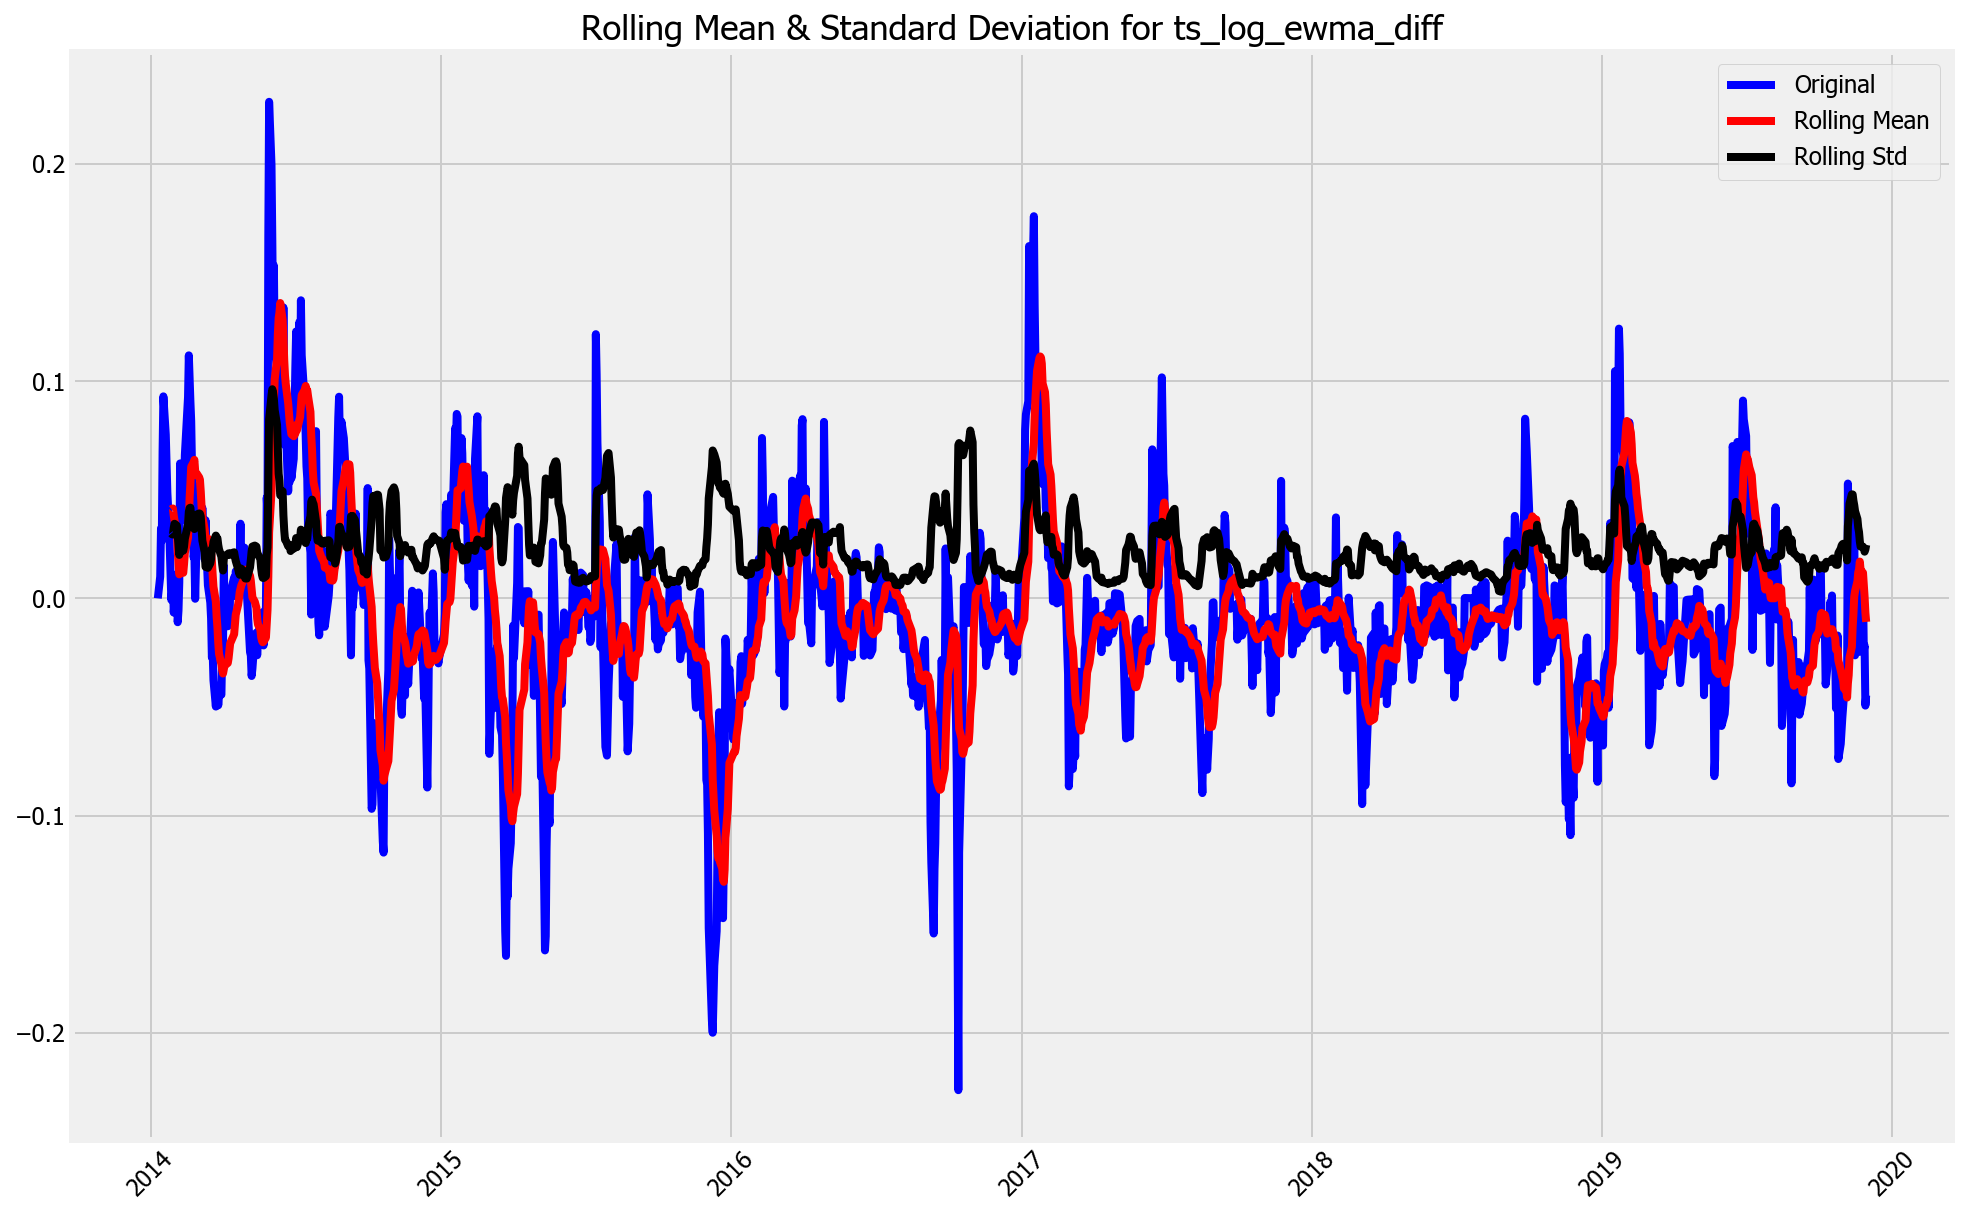

Results of Dickey-Fuller Test:
Test Statistic                   -8.76
p-value                           0.00
# Lags Used                       1.00
Number of Observations Used   1,437.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [23]:
#หาค่า moving_avg เเละพล๊อตกราฟ
# Transformation - log ts
df2['ts_log'] = df2['ts'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
df2['ts_log_moving_avg'] = df2['ts_log'].rolling(window = 7,
                                                               center = False).mean()

# Transformation - 7-day moving average ts
df2['ts_moving_avg'] = df2['ts'].rolling(window = 7,
                                                       center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
# df2['ts_log_diff'] = df2['ts_log'] - df2['ts_log'].shift()
df2['ts_log_diff'] = df2['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
df2['ts_moving_avg_diff'] = df2['ts'] - df2['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df2['ts_log_moving_avg_diff'] = df2['ts_log'] - df2['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df2_transform = df2.dropna()

# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df2_transform['ts_log_ewma'] = df2_transform['ts_log'].ewm(halflife = 7,
                                                                         ignore_na = False,
                                                                         min_periods = 0,
                                                                         adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
df2_transform['ts_log_ewma_diff'] = df2_transform['ts_log'] - df2_transform['ts_log_ewma']

# Display data
display(df2_transform.head())

# Plot data
plot_transformed_data(df = df2, 
                      ts = 'ts', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = df2, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')

# Plot data
plot_transformed_data(df = df2_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

# Perform stationarity test
test_stationarity(df = df2_transform, 
                  ts = 'ts_log')

# Perform stationarity test
test_stationarity(df = df2_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
test_stationarity(df = df2_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
test_stationarity(df = df2_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
test_stationarity(df = df2_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df2_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
test_stationarity(df = df2_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
test_stationarity(df = df2_transform,
                  ts = 'ts_log_ewma_diff')

In [24]:
def plot_decomposition(df, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


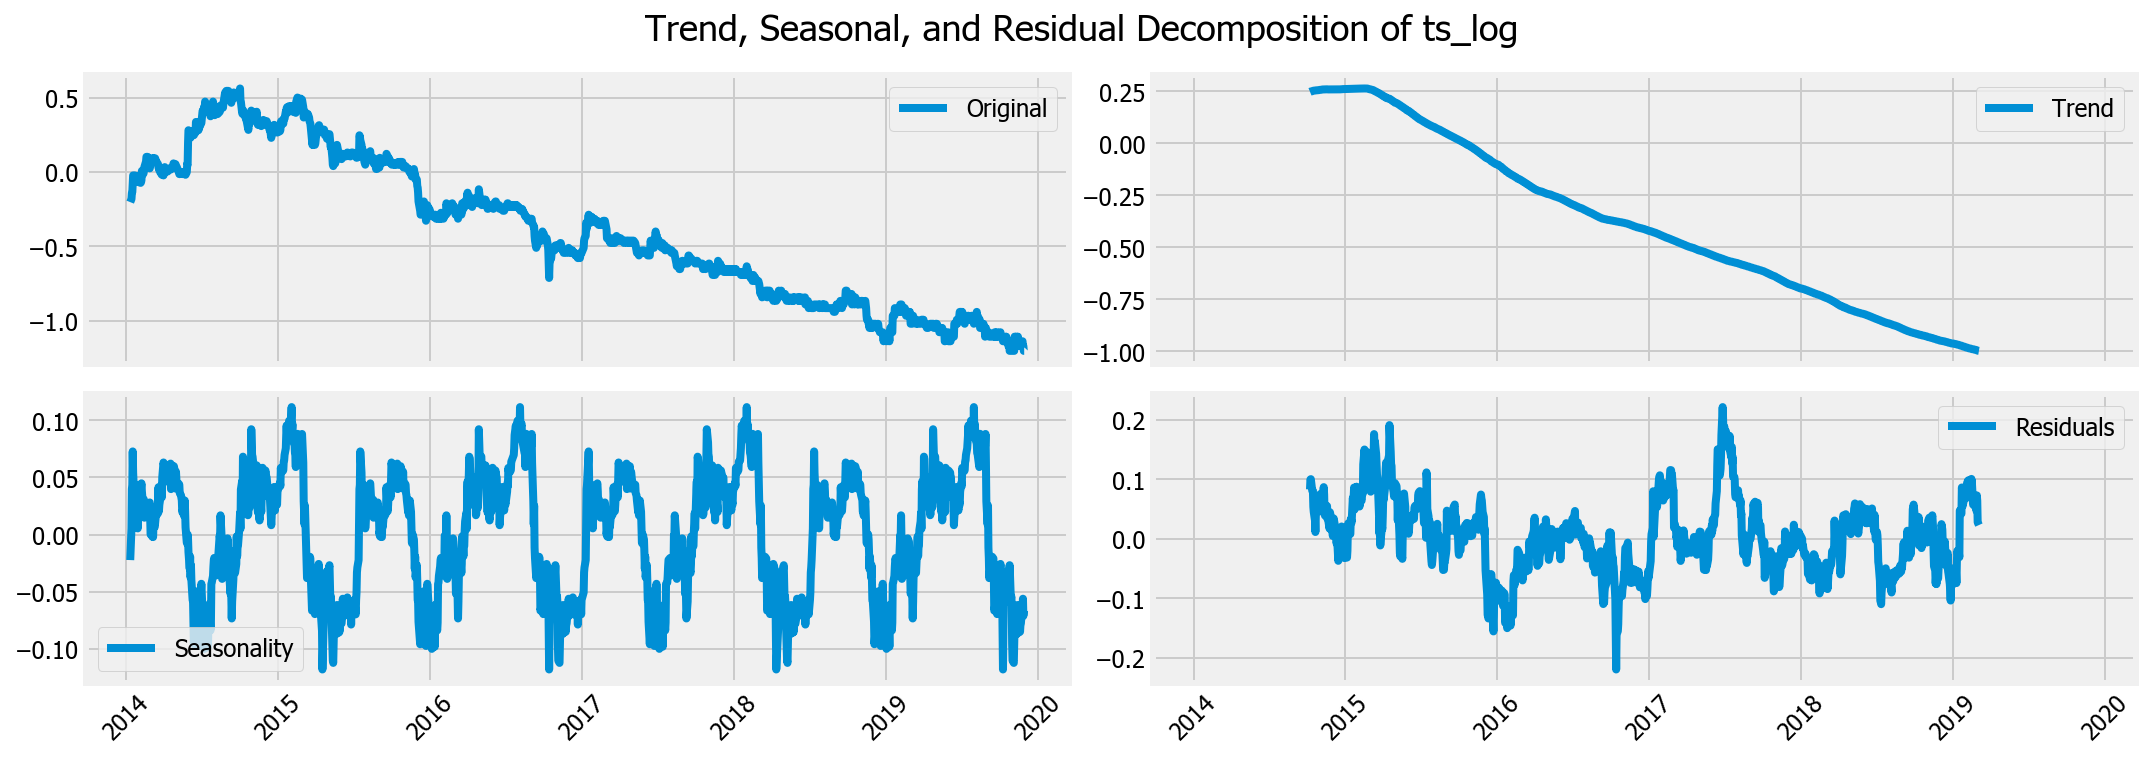

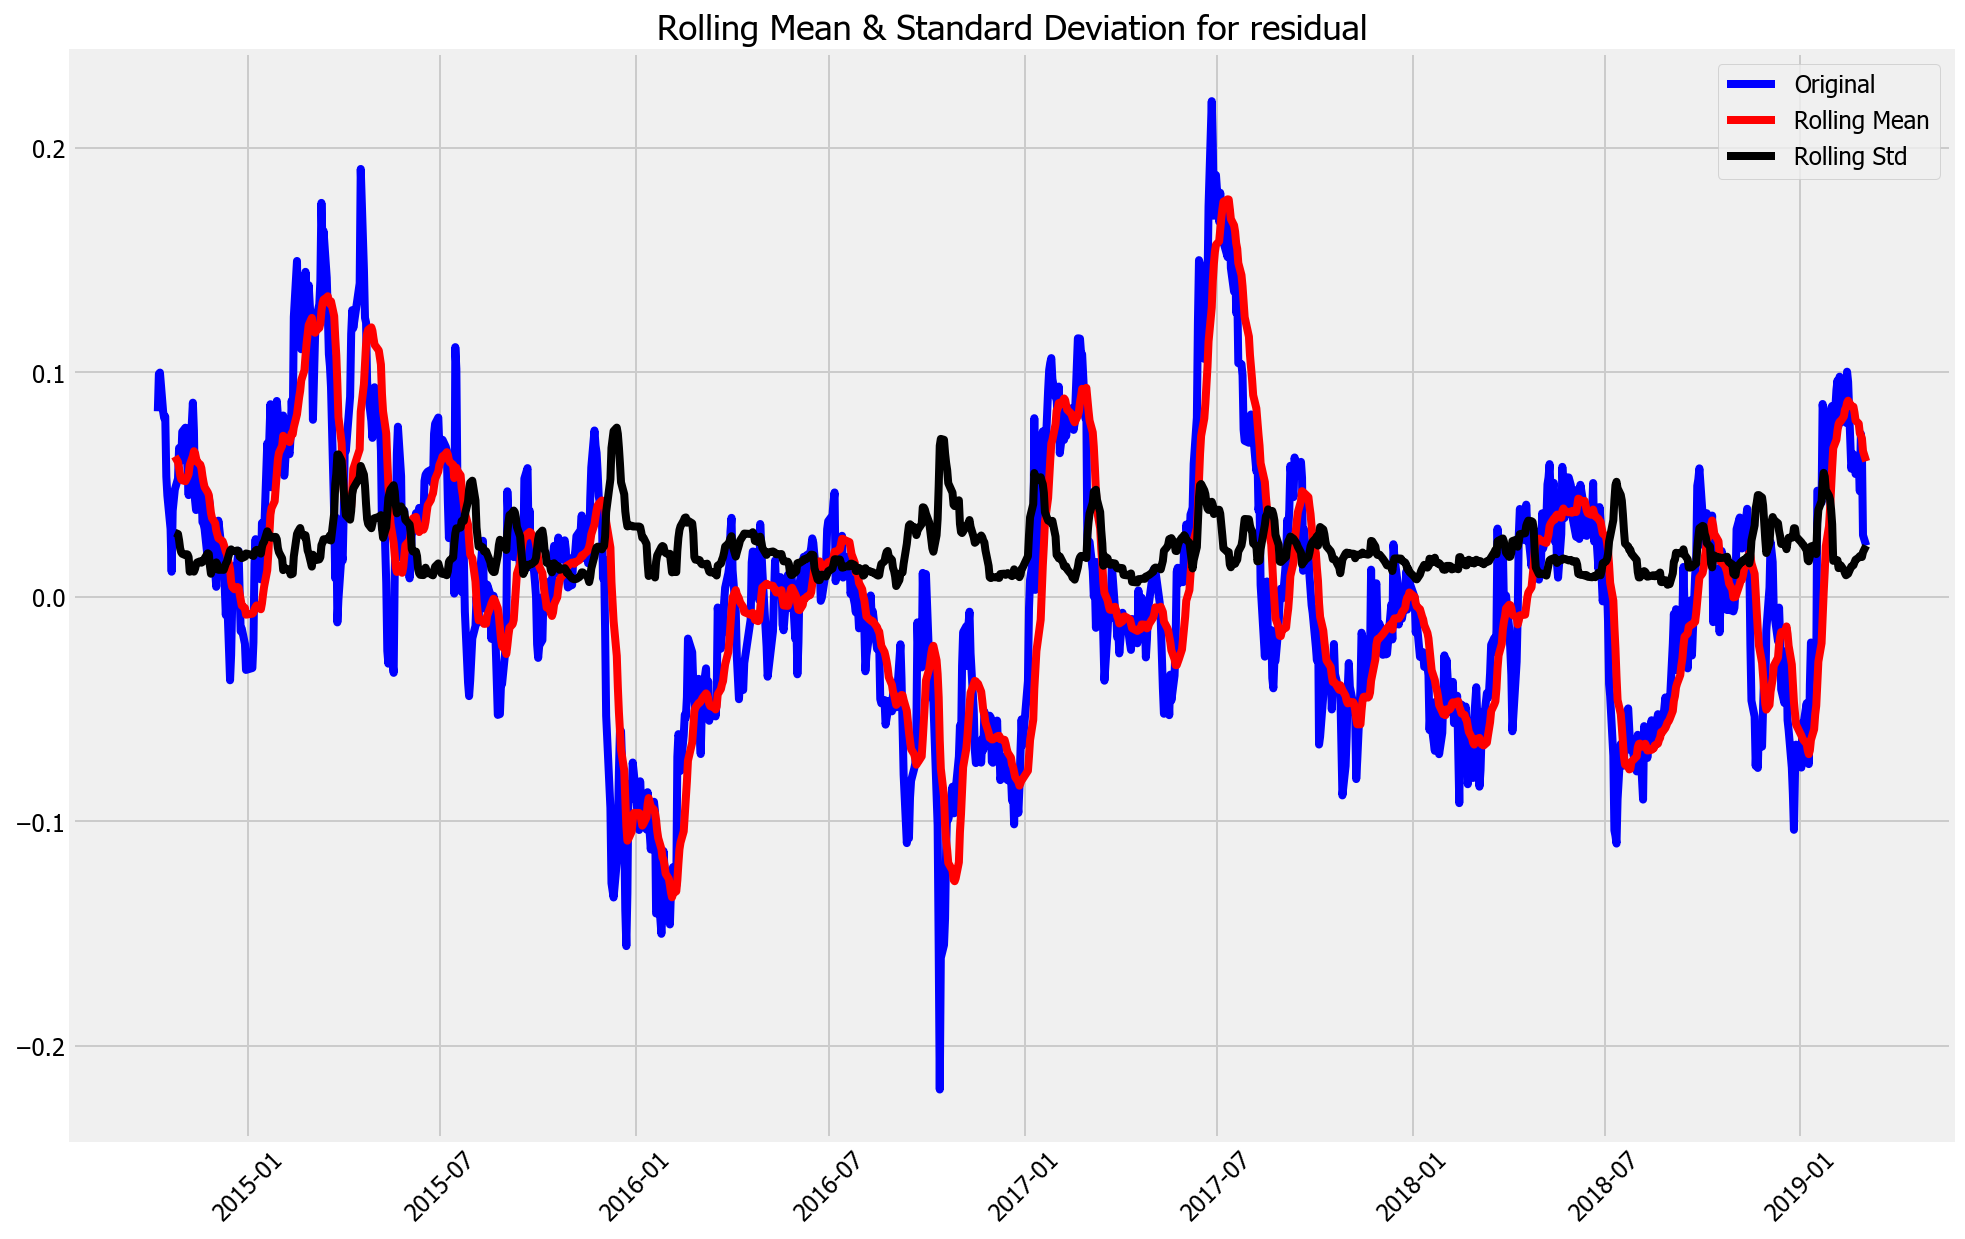

Results of Dickey-Fuller Test:
Test Statistic                   -4.92
p-value                           0.00
# Lags Used                       3.00
Number of Observations Used   1,071.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [25]:
#กราฟ sesonal 4กราฟ
df_example_transform = df2_transform
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_transform['ts_log'], freq = 365)

df_example_transform.loc[:,'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_transform, 
                   ts = 'ts_log', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

In [26]:
#ARIMA Model
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

In [27]:
def run_arima_model(df, ts, p, d, q):
  """
  Run ARIMA model
  """
  from statsmodels.tsa.arima_model import ARIMA

  # fit ARIMA model on time series
  model = ARIMA(df[ts], order=(p, d, q))  
  results_ = model.fit(disp=-1)  
  
  # get lengths correct to calculate RSS
  len_results = len(results_.fittedvalues)
  ts_modified = df[ts][-len_results:]
  
  # calculate root mean square error (RMSE) and residual sum of squares (RSS)
  rss = sum((results_.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss / len(df[ts]))
  
  # plot fit
  plt.plot(df[ts])
  plt.plot(results_.fittedvalues, color = 'red')
  plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
  
  plt.show()
  plt.close()
  
  return results_

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


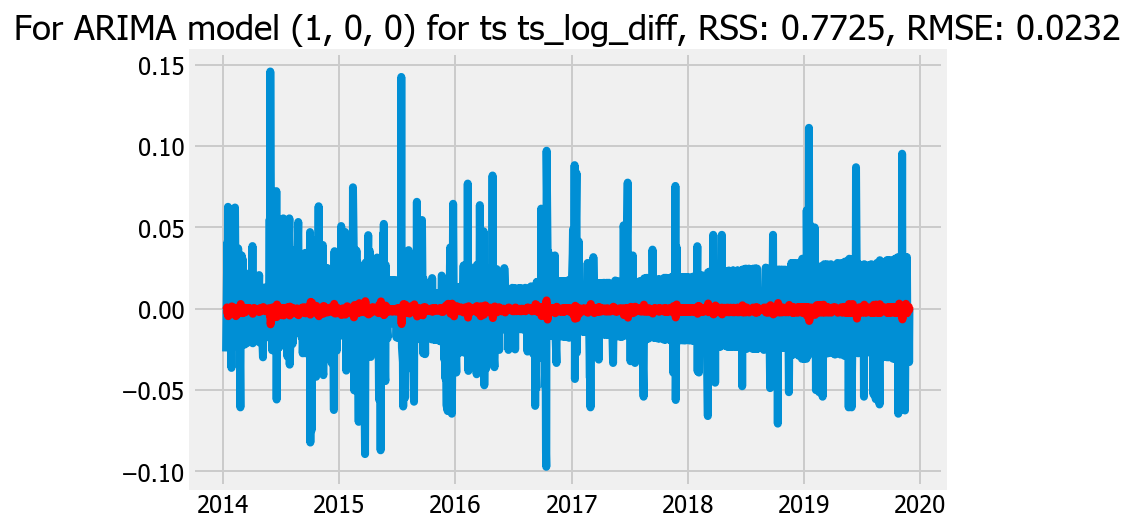

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


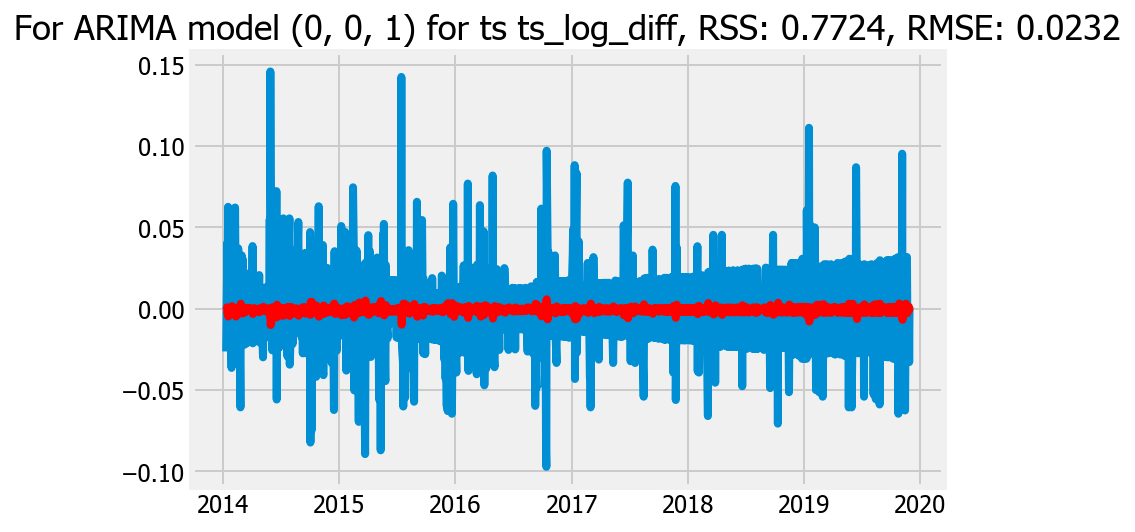

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


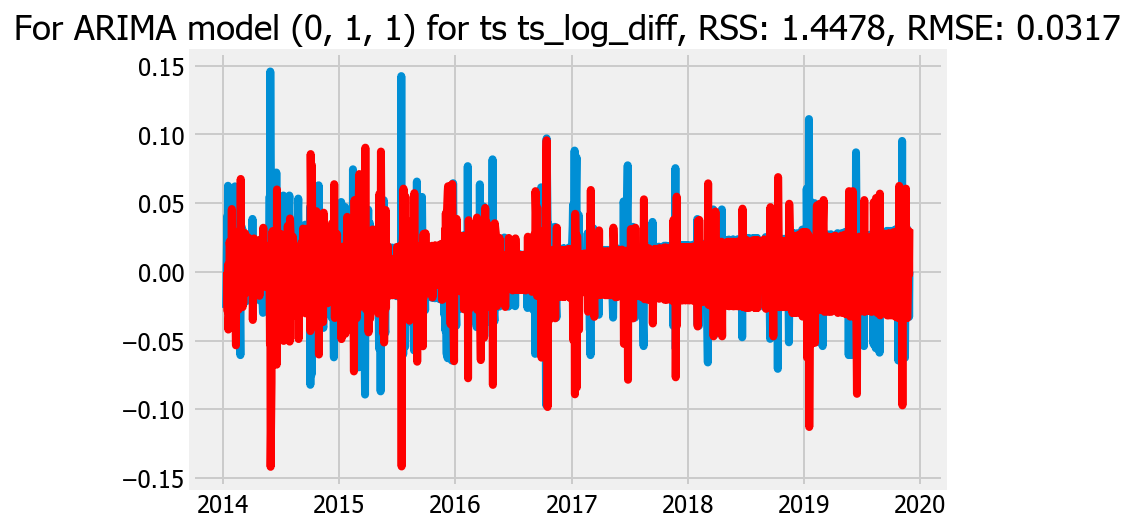

In [28]:
model_AR = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 0, 
                           d = 0, 
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (0,1,0)
model_MA = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 0, 
                           d = 1, 
                           q = 1)

In [29]:
from fbprophet import Prophet
import datetime
from datetime import datetime

In [30]:
df_example = df2
def days_between(d1, d2):
    """Calculate the number of days between two dates.  D1 is start date (inclusive) and d2 is end date (inclusive)"""
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

# Inputs for query

date_column = 'Date'
metric_column = 'ts'
table = df_example
start_training_date = '2004-08-19'
end_training_date = '2019-08-12'
start_forecasting_date = '2019-08-13'
end_forecasting_date = '2019-12-31'
year_to_estimate = '2019'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10
# If you find that the holidays are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 

# mcmc_samples: default = 0
# By default Prophet will only return uncertainty in the trend and observation noise.
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
# Replaces typical MAP estimation with MCMC sampling, and takes MUCH LONGER - e.g., 10 minutes instead of 10 seconds.
# If you do full sampling, then you will see the uncertainty in seasonal components when you plot:
mcmc_samples = 0

holidays = None

daily_seasonality = True

In [31]:
# get relevant data - note: could also try this with ts_log_diff
df_prophet = df_example_transform[['ts']] # can try with ts_log_diff

# reset index
df_prophet = df_prophet.reset_index()

# rename columns
df_prophet = df_prophet.rename(columns = {'Date': 'ds', 'ts': 'y'}) # can try with ts_log_diff

# Change 'ds' type from datetime to date (necessary for FB Prophet)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Change 'y' type to numeric (necessary for FB Prophet)
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='ignore')

# Remove any outliers
# df.loc[(df_['ds'] > '2016-12-13') & (df_['ds'] < '2016-12-19'), 'y'] = None

In [32]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
  """
  Create forecast
  """
  
  # Create copy of dataframe
  df_ = df.copy()

  # Add in growth parameter, which can change over time
  #     df_['cap'] = max(df_['y']) if cap is None else cap

  # Create model object and fit to dataframe
  m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)

  # Fit model with dataframe
  m.fit(df_)

  # Create dataframe for predictions
  future = m.make_future_dataframe(periods = future_num_points)

  # Create predictions
  fcst = m.predict(future)

  # Plot
  m.plot(fcst);
  m.plot_components(fcst)

  return fcst

C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



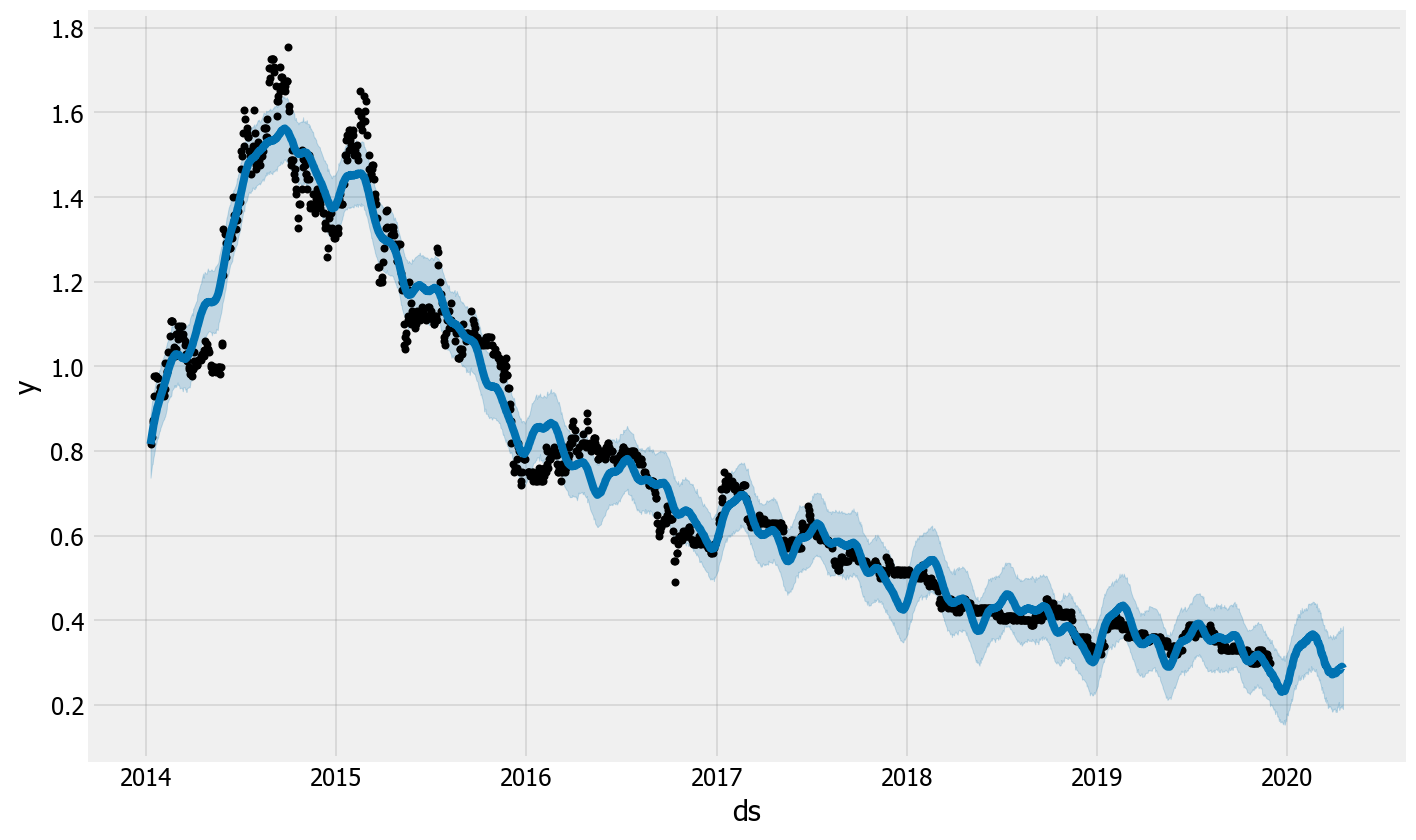

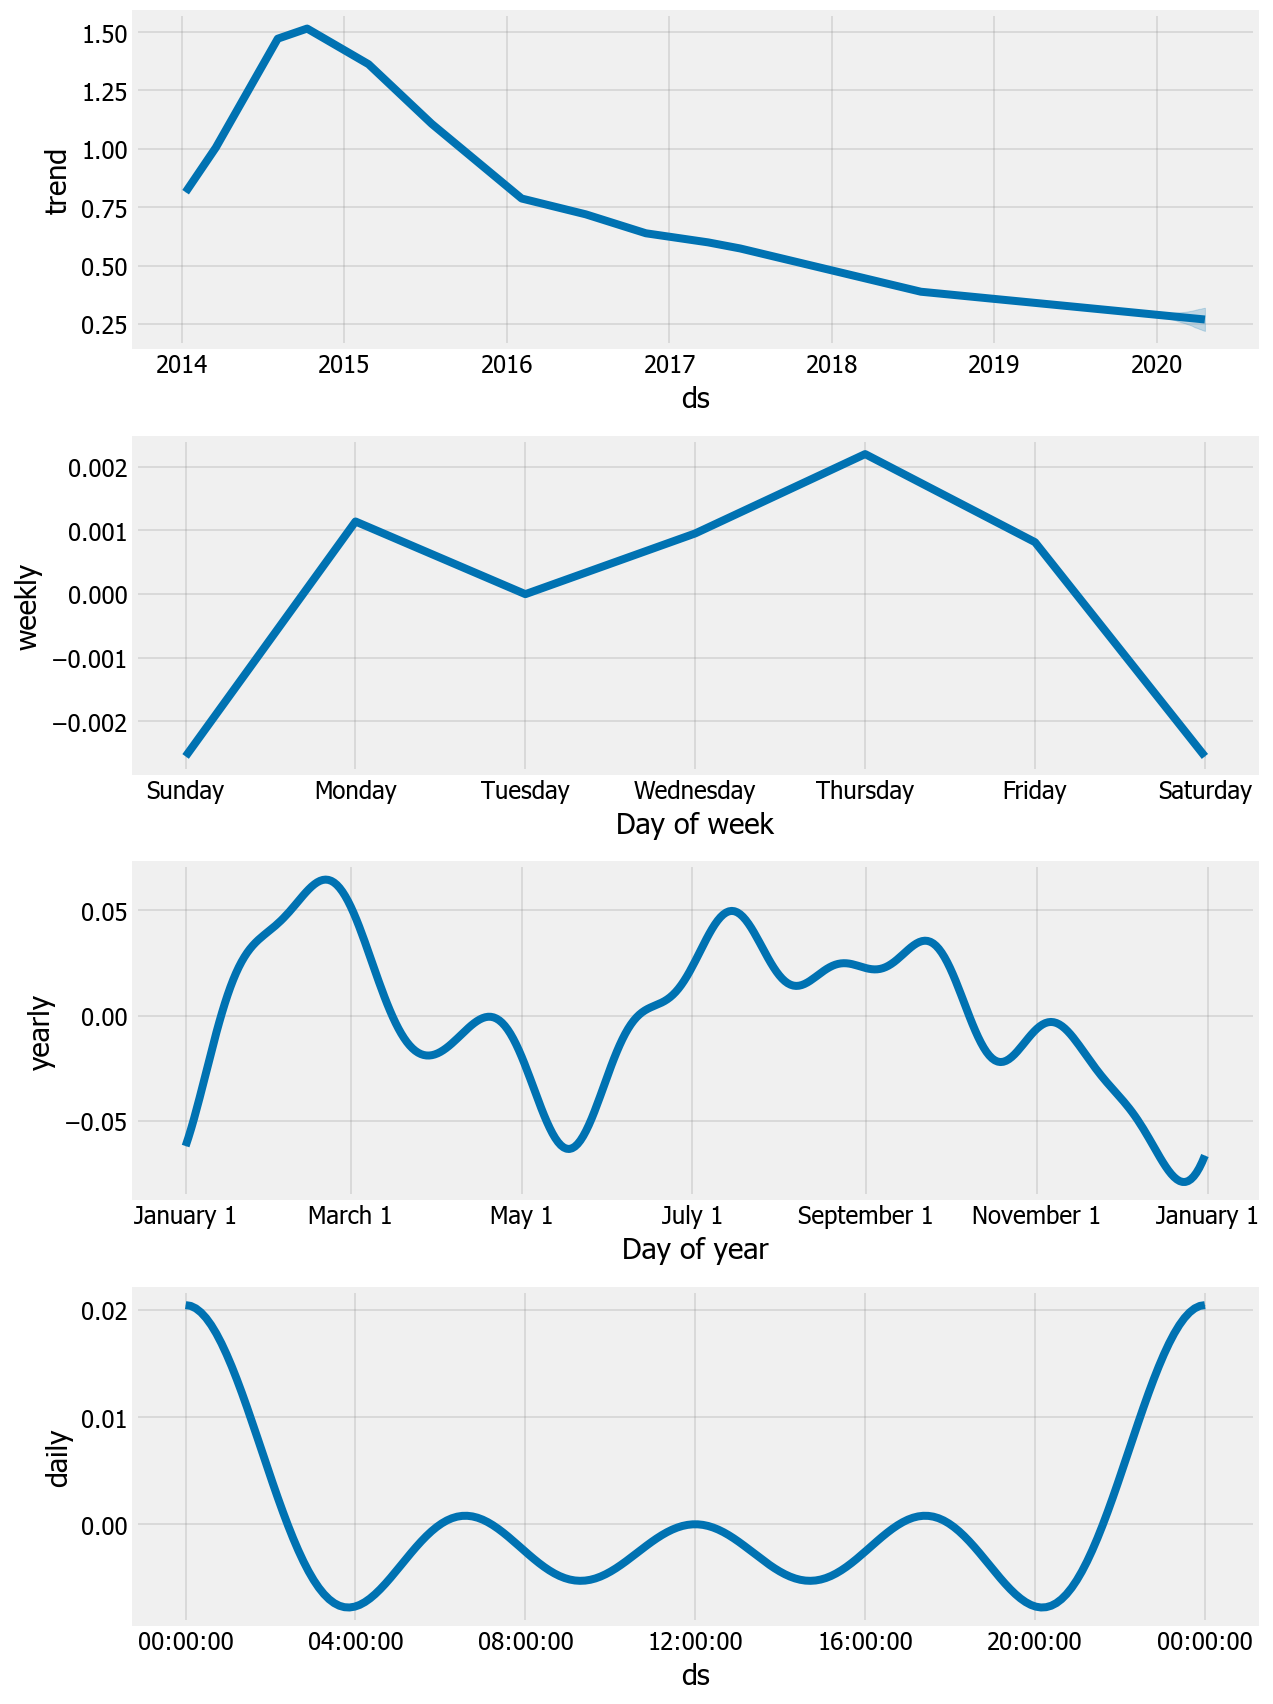

In [33]:
fcst = create_daily_forecast(df_prophet,
#                              cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

In [34]:
#ค่า Errorต่างๆ
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [35]:
print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 5.922952
MPE: -0.362371
MAE: 4.401904
RMSE: 0.058133


In [36]:
#RNN 

def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  
  return

Using TensorFlow backend.
W1223 00:09:15.627824 32724 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1223 00:09:15.641790 32724 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1223 00:09:15.643782 32724 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1223 00:09:15.769479 32724 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1223 00:09:15.904089 32724 deprecation.py:323] From C:\Us

Epoch 1/5
 - 2s - loss: 0.0456
Epoch 2/5
 - 1s - loss: 0.0049
Epoch 3/5
 - 1s - loss: 3.8750e-04
Epoch 4/5
 - 1s - loss: 3.4453e-04
Epoch 5/5
 - 1s - loss: 3.4611e-04
Train Score: 0.03 RMSE
Test Score: 0.04 RMSE


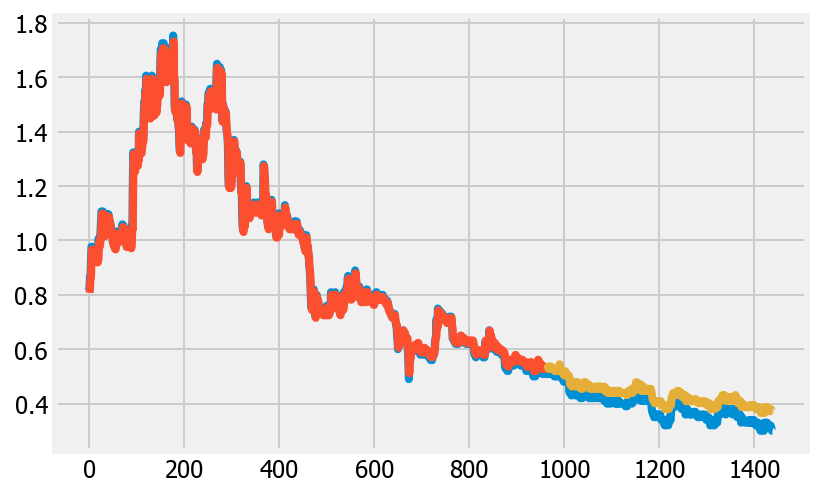

Epoch 1/5
 - 2s - loss: 0.0484
Epoch 2/5
 - 1s - loss: 0.0015
Epoch 3/5
 - 1s - loss: 7.7332e-04
Epoch 4/5
 - 1s - loss: 7.2176e-04
Epoch 5/5
 - 1s - loss: 6.5679e-04
Train Score: 0.04 RMSE
Test Score: 0.05 RMSE


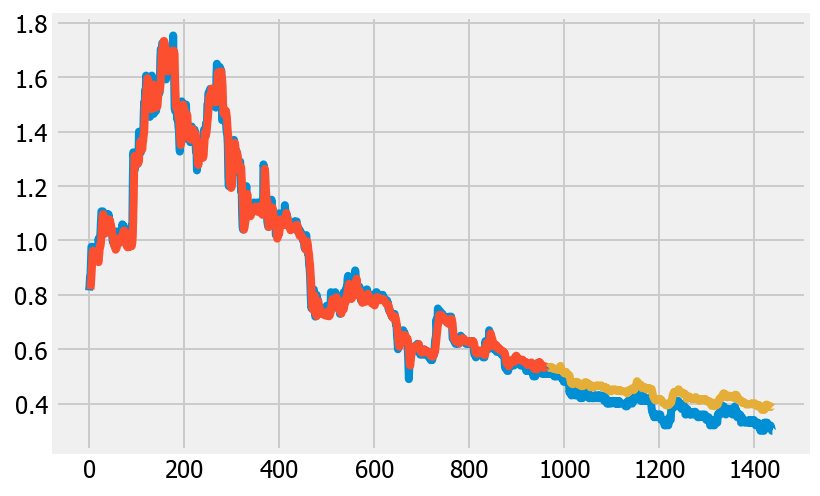

Epoch 1/5
 - 2s - loss: 0.0237
Epoch 2/5
 - 2s - loss: 5.5149e-04
Epoch 3/5
 - 2s - loss: 5.3002e-04
Epoch 4/5
 - 2s - loss: 5.3686e-04
Epoch 5/5
 - 2s - loss: 5.3242e-04
Train Score: 0.03 RMSE
Test Score: 0.04 RMSE


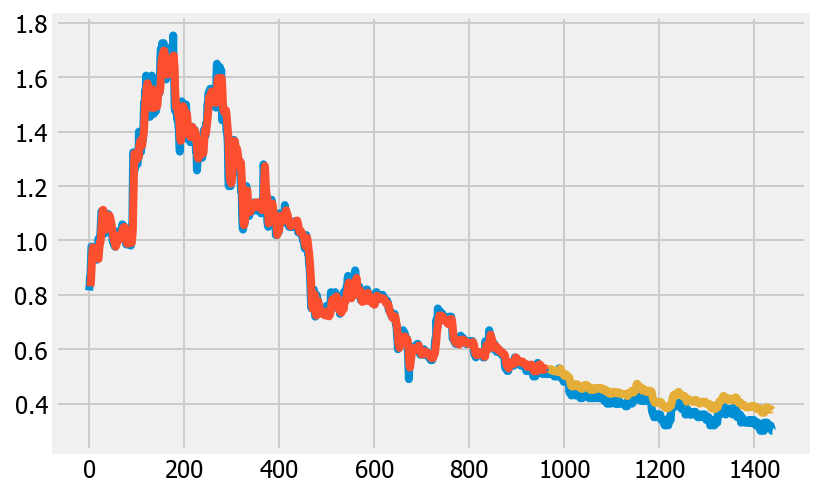

In [37]:
# LSTM Network for Regression
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = df_prophet, 
              ts = 'y', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')